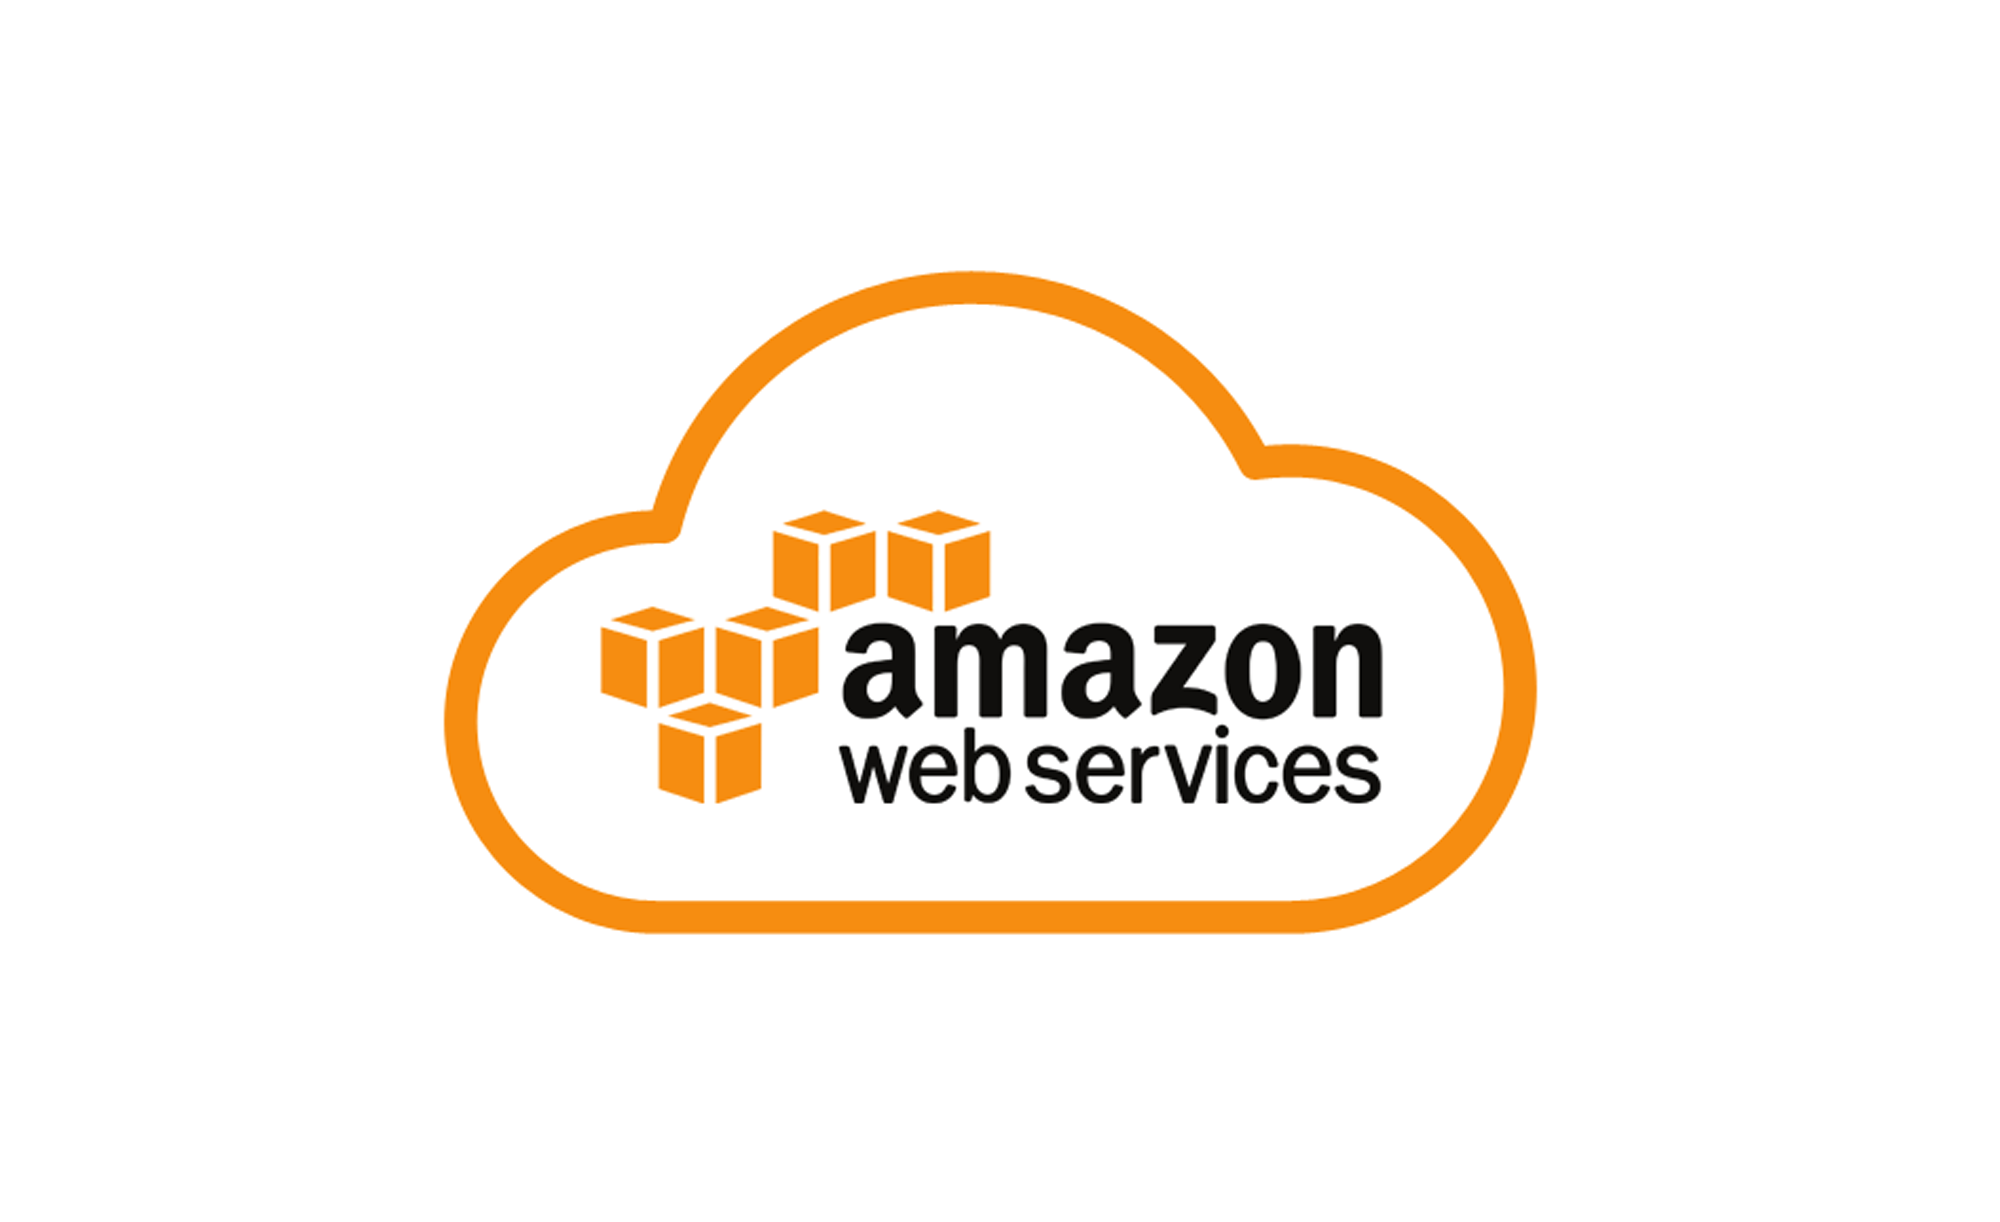

# Contact
- Name =  Shafy Hafidz (JCDS0508)
- Division =  Data Analyst
- Email = Sh4XXXXXXXX@gmail.com
- Phone = 081XXXXXXXX

---

# Background
Amazon Web Services (AWS) is a cloud computing services platform introduced by Amazon in 2006. 
AWS's background stems from Amazon's need to manage an efficient and scalable IT infrastructure to support its e-commerce business.
Over time, AWS has become the world's leading cloud service provider, offering more than 200 services in areas such as computing, storage, databases, analytics, and artificial intelligence.

Notes : In this case, Data is talking about History Purchase customer using product services AWS and will be proceed to be analysis , such as
1. How much Sales happen,
2. How much Discount are apply or given,
3. How much Profit,
4. How many Quantity of all product services are being rent,
5. How much different in sales, discount, profit, and quantity,
6. Top 10 Customer in term of Sales and Profit,
7. Different Sales based on industry, Segment, and Product,
8. Which region are used our services mostly.

In this file, division Data Analyst will check the condition of current Raw Data, what we check is :
1. Data can be accesable ?,
2. Data are being in suitble format to working with ?,
3. How many data missing ?,
4. What decision to handle data missing ?,
5. Is data normalized ?,
6. How many outlier data have ?,
7. What Decision to Handle Outlier data ?,
8. Data Analyst based on variable,
9. Our Conclusion and Recomendation.

We Hope this data can help you to understand the data more widely, and can be used such as Refrence and Recomendation to your Decision making

# Problem Statement
1. Sales and Profit Trends:

    - How do total sales and total profit trend over time in AWS SaaS data? (Line Plot)
    - Are there any seasonal patterns or significant changes in sales and profits? (Line Plot)

2. Discount Strategy

    - Correlation of discounts with sales quantity (Correlation Heatmap and ScatterPLot)

3. Product, Customer, Region, and Segmen

    - Which product is the most profitable by customer? (Top 10 Bar Plot)
    - How is the profit gap (Margin) by customer? (Line Plot/Bar Plot)
    - The highest-selling product? (Top 10 bar Plot)
    - The highest-selling, Profit & Margin by region? (Top 10 bar Plot)
    - The highest-selling, Profit & Margin by segmen? (Top 10 bar Plot)
    - RFM
    - Churn Rate

**For** Increase Profit, and Engagement Customer

---

# Data Set
The dataset can be accessed [here](https://www.kaggle.com/datasets/nnthanh101/aws-saas-sales).

---

# Read Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings

pd.set_option('display.max_columns', None) # To set display columns
warnings.filterwarnings("ignore") # Ignore Warning

In [2]:
df = pd.read_csv("SaaS-Sales.csv")
display(df.head(),df.tail())

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,1,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136
1,2,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
2,3,AMER-2022-138688,6/13/2022,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714
3,4,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
4,5,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164


,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
9989,9990,EMEA-2020-110422,1/22/2020,20200122,Dan Allan,Germany,Hamburg,EMEA,EU-WEST,Johnson & Johnson,1055,Healthcare,SMB,SaaS Connector Pack,ETHXMB5TMD,25.248,3,0.2,4.1028
9990,9991,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,SaaS Connector Pack,LYHOKTRY7L,91.960,2,0.0,15.6332
9991,9992,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Site Analytics,I5SVMI6M88,258.576,2,0.2,19.3932
9992,9993,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Support,JHLW4P6LQ2,29.600,4,0.0,13.3200
9993,9994,AMER-2023-119914,5/5/2023,20230505,Jasmine Springer,United States,Dallas,AMER,NAMER,Comcast,1022,Communications,SMB,OneView,3NTBV9B3PS,243.160,2,0.0,72.9480


In [3]:
df.info() # (.info()) is being use to see what DataType in each columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Row ID        9994 non-null   int64  
 1   Order ID      9994 non-null   object 
 2   Order Date    9994 non-null   object 
 3   Date Key      9994 non-null   int64  
 4   Contact Name  9994 non-null   object 
 5   Country       9994 non-null   object 
 6   City          9994 non-null   object 
 7   Region        9994 non-null   object 
 8   Subregion     9994 non-null   object 
 9   Customer      9994 non-null   object 
 10  Customer ID   9994 non-null   int64  
 11  Industry      9994 non-null   object 
 12  Segment       9994 non-null   object 
 13  Product       9994 non-null   object 
 14  License       9994 non-null   object 
 15  Sales         9994 non-null   float64
 16  Quantity      9994 non-null   int64  
 17  Discount      9994 non-null   float64
 18  Profit        9994 non-null 

### Insight 
1. Data have 9994 Row data
2. Data have 19 columns
3. Data who have Dtype as int64 are = 4 columns
4. Data who have Dtype as object are = 12 columns
5. Data who have Dtype as float are = 3 columns


## Information about each Columns
Data have 9994 Rows and 19 columns, each columns represent information about data that are being used, therefore we need to understand what information in each columns conveys of in case you need documentation soft copy [Here](https://drive.google.com/drive/folders/1dlpJfgvs8P_IyXqWB4WrNwk91fx0XAzU).

1. Row ID: A unique identifier for each transaction.
2. Order ID: A unique identifier for each order.
3. Order Date: The date when the order was placed.
4. Date Key: A numerical representation of the order date (YYYYMMDD).
5. Contact Name: The name of the person who placed the order.
6. Country: The country where the order was placed.
7. City: The city where the order was placed.
8. Region: The region where the order was placed.
9. Subregion: The subregion where the order was placed.
10. Customer: The name of the company that placed the order.
11. Customer ID: A unique identifier for each customer.
12. Industry: The industry the customer belongs to.
13. Segment: The customer segment (SMB, Strategic, Enterprise, etc.).
14. Product: The product was ordered.
15. License: The license key for the product.
16. Sales: The total sales amount for the transaction.
17. Quantity: The total number of items in the transaction.
18. Discount: The discount applied to the transaction.
19. Profit: The profit from the transaction.

# Handle Missing Value

- Before processing data, we need to make sure data have no missing value, data which are clean from missing value are more easily to pre processing

In [4]:
df.isna().sum() # is being use to find How many data is missing in each Columns

Row ID          0
Order ID        0
Order Date      0
Date Key        0
Contact Name    0
Country         0
City            0
Region          0
Subregion       0
Customer        0
Customer ID     0
Industry        0
Segment         0
Product         0
License         0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

##### Insight
- Our data have 19 columns, after checking with code above, we could see that 
    - 19 Columns Didnt have any Missing Value
- Therefore our data coul be processing to another step of process which Handle Data Structure 

---

# Data Structure

## Data Understanding

In [5]:

pd.set_option('display.max_colwidth', None)
# Data unique in each Columns
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].isna().sum(), df[col].duplicated().sum(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Number Missing Value', 'Number Duplicated per Columns', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Number Missing Value,Number Duplicated per Columns,Unique Sample
0,Row ID,9994,0,0,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, ...]"
1,Order ID,5009,0,4985,"[EMEA-2022-152156, AMER-2022-138688, EMEA-2021-108966, AMER-2020-115812, EMEA-2023-114412, AMER-2022-161389, APJ-2021-118983, EMEA-2020-105893, EMEA-2020-167164, AMER-2020-143336, AMER-2022-137330, EMEA-2023-156909, EMEA-2021-106320, AMER-2022-121755, EMEA-2021-150630, APJ-2023-107727, APJ-2022-117590, APJ-2021-117415, APJ-2023-120999, AMER-2022-101343, EMEA-2023-139619, EMEA-2022-118255, AMER-2020-146703, APJ-2022-169194, APJ-2021-115742, EMEA-2022-105816, EMEA-2022-111682, AMER-2021-135545, APJ-2021-164175, AMER-2020-106376, EMEA-2022-119823, EMEA-2022-106075, AMER-2023-114440, EMEA-2021-134026, APJ-2023-118038, APJ-2020-147606, EMEA-2022-127208, AMER-2020-139451, EMEA-2021-149734, APJ-2023-119662, AMER-2023-140088, EMEA-2023-155558, APJ-2022-159695, AMER-2022-109806, EMEA-2021-149587, EMEA-2023-109484, EMEA-2023-161018, AMER-2023-157833, EMEA-2022-149223, APJ-2022-158568, EMEA-2022-129903, EMEA-2021-156867, EMEA-2023-119004, APJ-2021-129476, EMEA-2023-146780, EMEA-2022-128867, AMER-2020-115259, AMER-2021-110457, EMEA-2021-136476, APJ-2022-103730, APJ-2020-152030, APJ-2020-134614, AMER-2023-107272, AMER-2022-125969, AMER-2023-164147, AMER-2022-145583, EMEA-2022-110366, AMER-2023-106180, EMEA-2023-155376, AMER-2021-110744, AMER-2020-110072, EMEA-2022-114489, AMER-2022-158834, AMER-2021-124919, AMER-2021-118948, AMER-2020-104269, APJ-2022-114104, AMER-2022-162733, EMEA-2021-119697, APJ-2022-154508, AMER-2022-113817, APJ-2020-139892, AMER-2020-118962, APJ-2020-100853, APJ-2023-152366, AMER-2021-101511, EMEA-2021-137225, APJ-2020-166191, EMEA-2020-158274, EMEA-2022-105018, AMER-2020-123260, APJ-2022-157000, EMEA-2021-102281, AMER-2021-131457, AMER-2020-140004, AMER-2023-107720, EMEA-2023-124303, AMER-2023-105074, EMEA-2020-133690, APJ-2023-116701, ...]"
2,Order Date,1237,0,8757,"[11/9/2022, 6/13/2022, 10/11/2021, 6/9/2020, 4/16/2023, 12/6/2022, 11/22/2021, 11/11/2020, 5/13/2020, 8/27/2020, 12/10/2022, 7/17/2023, 9/25/2021, 1/16/2022, 9/17/2021, 10/20/2023, 12/9/2022, 12/27/2021, 9/11/2023, 7/18/2022, 9/20/2023, 3/12/2022, 10/20/2020, 6/21/2022, 4/18/2021, 12/12/2022, 6/18/2022, 11/24/2021, 4/30/2021, 12/5/2020, 6/5/2022, 9/19/2022, 9/15/2023, 4/26/2021, 12/10/2023, 11/26/2020, 10/12/2020, 9/3/2021, 11/14/2023, 5/29/2023, 10/27/2023, 4/6/2022, 9/18/2022, 1/31/2021, 11/7/2023, 11/10/2023, 6/18/2023, 9/7/2022, 8/30/2022, 12/2/2022, 11/13/2021, 11/24/2023, 10/15/2021, 12/26/2023, 11/4/2022, 8/25/2020, 3/2/2021, 4/5/2021, 12/26/2020, 9/20/2020, 11/6/2023, 11/7/2022, 2/3/2023, 10/14/2022, 9/6/2022, 9/19/2023, 12/23/2023, 9/7/2021, 10/22/2020, 3/14/2022, 5/31/2021, 5/28/2021, 3/1/2020, 11/21/2022, 5/12/2022, 12/28/2021, 11/17/2022, 11/8/2022, 9/8/2020, 8/5/2020, 9/14/2020, 4/22/2023, 11/21/2021, 12/15/2021, 11/19/2020, 11/29/2022, 8/26/2020, 7/17/2022, 10/12/2021, 10/31/2021, 3/21/2020, 7/7/2023, 6/25/2023, 8/3/2020, 12/18/2023, 6/4/2023, 12/2/2023, 2/9/2021, 1/2/2021, 10/29/2022, ...]"
3,Date Key,1237,0,8757,"[20221109, 20220613, 20211011, 20200609, 20230416, 20221206, 20211122, 20201111, 20200513, 20200827, 20221210, 20230717, 20210925, 20220116, 20210917, 20231020, 20221209, 20211227, 20230911, 20220718, 20230920, 20220312, 20201020, 20220621, 20210418, 20221212, 20220618, 20211124, 20210430, 20201205, 20220605, 20220919, 20230915, 20210426, 20231210, 20201126, 20201012, 20210903, 20231114, 20230529, 20231027, 20220406, 20220918, 20210131, 20231107, 20231110, 20230618, 20220907, 20220830, 20221202, 2021111

##### Insight 
1. Column `Row ID` as Primary Key didnt have any duplicated, and have 9994 unique ID
2. Column `License` which unique key from product for each Transaction also didnt have any duplicated, and have 9994 Unique License
3. Other Columns have duplicated data, but it acceptable because it represent data input for customer and can be same
4. Columns `Order Date` are represent date which Datatype should be Datetime, [NEED TO HANDLE - DateTime]
5. Columns `Date Key` are only represent label for columns `Order Date` [DROP COLUMNS]
    - which in this case didnt need because columns `Order Date` already enough to represent date
    - Didnt represent any uniqueness to data in each columns
    - `Date Key` are helpful if you want to search transaction for both companies, but only to Operational, our divsion and other division who working with this data analysis doesnt need this
6. Columns `Customer ID` are represent for unique customer, which could be categorize as Clasiffication, why it didnt drop like `Date Key` the reason is `Customer ID` have potential to bey primary key in other data in other division, that why in this case [NEED TO HANDLE - Object]
7. Columns `Row ID` are represent for unique data in row, which could be categorize as Clasiffication, in this case [NEED TO HANDLE - Object]
8. Columns `Country`,`City`,`Region` and `Subregion` are represent location in world which should be change to Region/Country/City, but in python there is no method to change Dtype to region, which we will keep it as Object, and change it in Tableu

##### **Aditional Insight 1:**

- Product Describe
1. Marketing Suite
    - A suite of AWS tools for managing marketing workflows, such as campaign tracking, customer segmentation, and engagement analysis. It could integrate with Amazon Pinpoint for targeted messaging and analytics.

4. Marketing Suite - Gold
    - A premium version of Marketing Suite offering advanced features such as real-time predictive analytics (via SageMaker), enhanced customer insights, and dedicated support.

2. FinanceHub
    - A centralized financial analytics and reporting tool built on AWS, possibly using services like Amazon QuickSight for dashboards, AWS Lambda for automation, and Amazon Redshift for data warehousing.

3. ContactMatcher
    - A tool for deduplication and contact list management using AWS database services like DynamoDB or RDS, combined with AI/ML capabilities from Amazon SageMaker to improve data matching accuracy.

5. SaaS Connector Pack
    - A collection of prebuilt AWS integrations for popular SaaS applications. It could use AWS AppFlow for data synchronization, API Gateway for custom integrations, and AWS Lambda for automation workflows.

11. SaaS Connector Pack - Gold
    - A premium version of the SaaS Connector Pack, likely offering expanded integrations, higher data transfer limits, and enhanced security features.

6. ChatBot Plugin
    - An AWS-hosted chatbot solution powered by Amazon Lex (for natural language understanding) and integrated with AWS Lambda for backend logic.

7. Site Analytics
    - A web analytics service built on AWS, leveraging tools like Amazon Kinesis for real-time event processing, Amazon S3 for log storage, and QuickSight for visualization.

8. OneView
    - A unified dashboard solution on AWS that aggregates data from multiple sources, possibly using AWS Glue for ETL (Extract, Transform, Load) and QuickSight for visualizations.

9. Support
    - AWS's customer support product, possibly referring to a support ticketing system or an enhanced managed service solution to assist users in troubleshooting and optimizing their AWS resources.

10. Data Smasher
    - A data aggregation and transformation tool that uses AWS Glue, EMR (Elastic MapReduce), or AWS Step Functions to combine and process data from multiple sources.

12. Storage
    - Refers to AWS's storage solutions like Amazon S3 (object storage), EBS (block storage), or Glacier (cold storage for archival).

13. Big Ol Database
    - Likely a nickname for a high-capacity database service like Amazon Aurora or DynamoDB, designed for scalability and high availability.

14. Alchemy
    - Possibly a managed service or toolkit for transforming and enriching data using AWS Glue, SageMaker for machine learning-driven transformations, or AWS Lake Formation for data lake management.

## Handle Data

### Change Dtype

- we will change columns `Order Date`, `Row ID` and `Customer ID` the reason are already identified in Data Understanding

In [6]:
import datetime as dt # Run this to use datetime Library in Python

In [7]:
df['Order Date'] = pd.to_datetime(df['Order Date'],format='mixed', dayfirst=True) # Convert Columns to datetime

In [8]:
df['Customer ID'] = df['Customer ID'].astype(str) # Convert DType from int to str (String/Object)
df['Row ID'] = df['Row ID'].astype(str) # Convert DType from int to str (String/Object)

### Drop Column

- we will drop columns `Date Key` the reason is already identified in Data Understanding

In [9]:
df = df.drop(columns='Date Key')

## Cross Check Data after Handling Missing Value and Consistency Data

After Handling data run this code to check again if there is any missing value, or check if consistency data are already Match or not

In [10]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'unique', 'uniqueSample'],
                     data=listItem)
print(df.shape)
dfDesc

(9994, 18)


,dataFeatures,dataType,null,unique,uniqueSample
0,Row ID,object,0,9994,"[1666, 5809]"
1,Order ID,object,0,5009,"[APJ-2022-158925, EMEA-2022-164091]"
2,Order Date,datetime64[ns],0,1237,"[2023-01-07T00:00:00.000000000, 2023-02-19T00:00:00.000000000]"
3,Contact Name,object,0,793,"[Sean Rees, Hannah Hughes]"
4,Country,object,0,48,"[Slovenia, Japan]"
5,City,object,0,262,"[Wellington, New York City]"
6,Region,object,0,3,"[AMER, EMEA]"
7,Subregion,object,0,12,"[LATAM, JAPN]"
8,Customer,object,0,99,"[Target, Sprint Nextel]"
9,Customer ID,object,0,99,"[1039, 1024]"


#### Insight
1. Our data have 
    - 19 columns --> 18 Columns, after drop columns `Date Key`
    - Still have 9994 Row Data

2. Our data type have change 
    - `Row ID` from int --> object
    - `Order Date` from object --> datetime
    - `Customer ID` from int --> object
    
3. There is no missing Value in our data indicating our handling is Succes, 
    - NOTE : PLEASE re-Check your handling missing data to make sure !!!


## Add Data that needed to Analysis

Beacuse our data are related to `Sales`,`Profit`,`Discount`, and `Quantity`, we need another columns to be analysis
1. Columns = `Discount Nominal` (Columns will show total Discount in Currency not Ratio) 
2. Columns = `Sales Discount` (Column will show Total Sales after being substrack with Discount)
3. Columns = `Margin` (Columns will show the gap beetween Profit and Sales Discount in Ratio)
3. Columns = `Product Price` (Column will show price of 1 product or price @product)   

In [11]:
df['Discount Nominal'] = (df['Discount'] * df['Sales']) * df['Quantity']
df['Sales Discount'] = df['Sales'] - df['Discount Nominal']
df['Margin'] = df.apply(lambda row: (row['Profit'] / row['Sales Discount']) * row['Profit'] if row['Sales Discount'] > 0 else 0, axis=1)
df['Product Price'] = df['Sales'] / df['Quantity']

In [12]:
df.head(5)

,Row ID,Order ID,Order Date,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit,Discount Nominal,Sales Discount,Margin,Product Price
0,1,EMEA-2022-152156,2022-09-11,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136,0.000000,261.960000,6.706176,130.9800
1,2,EMEA-2022-152156,2022-09-11,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820,0.000000,731.940000,65.874600,243.9800
2,3,AMER-2022-138688,2022-06-13,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714,0.000000,14.620000,3.229558,7.3100
3,4,EMEA-2021-108966,2021-11-10,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310,2154.549375,-1196.971875,0.000000,191.5155
4,5,EMEA-2021-108966,2021-11-10,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164,8.947200,13.420800,0.471825,11.1840


## Checking Outlier

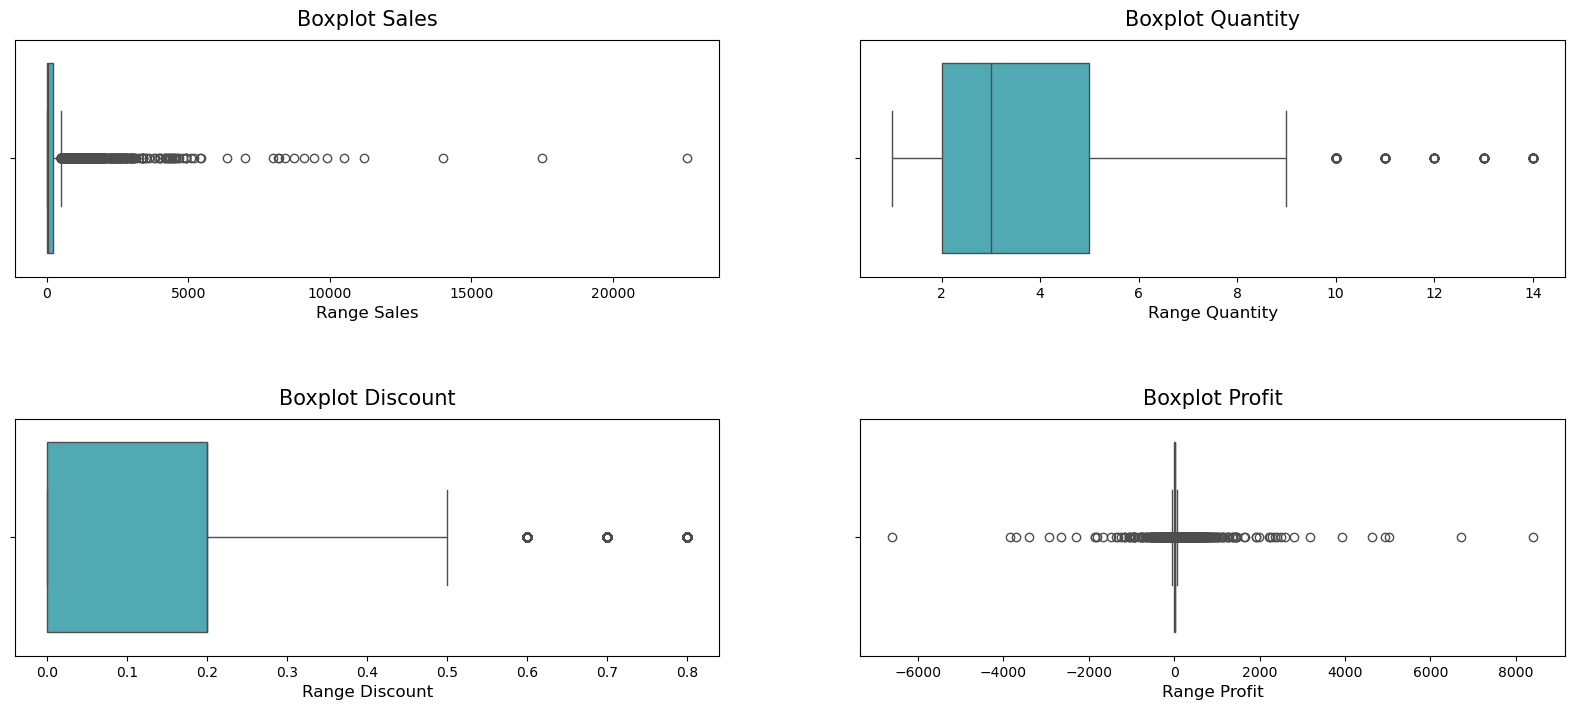

In [13]:
plt.figure(figsize=(20,8))
# Boxplot for Sales
plt.subplot(2, 2, 1)
plt.title('Boxplot Sales',pad=10,size=15)
sns.boxplot(data=df, x='Sales', palette='YlGnBu')

plt.xlabel('Range Sales', size=12)

#Boxplot for Quantity
plt.subplot(2, 2, 2)
plt.title('Boxplot Quantity',pad=10,size=15)
sns.boxplot(data=df, x='Quantity', palette='YlGnBu')

plt.xlabel('Range Quantity', size=12)

#Boxplot for Discount
plt.subplot(2, 2, 3)
plt.title('Boxplot Discount', pad=10, size=15)
sns.boxplot(data=df, x='Discount', palette='YlGnBu')

plt.xlabel('Range Discount', size=12)

#Boxplot for Profit
plt.subplot(2, 2, 4)
plt.title('Boxplot Profit', pad=10, size=15)
sns.boxplot(data=df, x='Profit', palette='YlGnBu')

plt.xlabel('Range Profit', size=12)

plt.subplots_adjust(hspace=0.6)


In [14]:
df_outlier = df[['Sales','Discount','Quantity','Profit']]
df_outlier

,Sales,Discount,Quantity,Profit
0,261.9600,0.00,2,41.9136
1,731.9400,0.00,3,219.5820
2,14.6200,0.00,2,6.8714
3,957.5775,0.45,5,-383.0310
4,22.3680,0.20,2,2.5164
...,...,...,...,...
9989,25.2480,0.20,3,4.1028
9990,91.9600,0.00,2,15.6332
9991,258.5760,0.20,2,19.3932
9992,29.6000,0.00,4,13.3200


In [15]:
outlier_info = {}

for column in df_outlier.columns:
    Q1 = df_outlier[column].quantile(0.25)
    Q3 = df_outlier[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    Outliers = (df_outlier[column] < lower_bound) | (df_outlier[column] > upper_bound)
    Total_outliers = Outliers.sum()

    outlier_info[column] = {
        'Q1': Q1,
        'Q3': Q3,
        'IQR': IQR,
        'Lower Bound': lower_bound,
        'Upper Bound': upper_bound,
        'Outlier' : Total_outliers
    }

outlier_df = pd.DataFrame(outlier_info).T
outlier_df

,Q1,Q3,IQR,Lower Bound,Upper Bound,Outlier
Sales,17.28000,209.940,192.66000,-271.710000,498.930000,1167.0
Discount,0.00000,0.200,0.20000,-0.300000,0.500000,856.0
Quantity,2.00000,5.000,3.00000,-2.500000,9.500000,170.0
Profit,1.72875,29.364,27.63525,-39.724125,70.816875,1881.0


### Insight
1. Sales: There are 1167 outliers, showing that some transactions involve very large amounts.

2. Quantity: There are 170 outliers, either way customer buy rarely or but in bulk amount of product.

3. Discount: There are 856 outliers in discounts, with most values more than 0.5, likely indicating special deals or promotions offered to certain customers in small portion and event.

4. Profit: There are 1,881 outliers for profit, meaning some transactions resulted in either very high or very low profits.

---

# Saving file Clean Data
- in any case you need to processing data in differend way, you can run this code

In [16]:
# RUN THIS to save as EXCEL
#df.to_excel('Data Clean.xlsx', index=False)

# RUN THIS to save as csv
# df.to_csv('Data Clean.csv', index=False)

# RUN THIS to save as JSON
#df.to_json('Data Clean.json', index=False)

---

# Data Analysis

## 1. Sales and Profit Trends:

    - How do total sales and total profit trend over time in AWS SaaS data? (Line Plot)
    - Are there any seasonal patterns or significant changes in sales and profits? (Line Plot)

In [17]:
df_1 = df[['Order Date','Sales','Profit']]
df_1['Month Name'] = df_1['Order Date'].dt.month_name()
df_1['Year'] = df_1['Order Date'].dt.year
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']
year_order = [2020, 2021, 2022, 2023]

df_1['Month Name'] = pd.Categorical(df_1['Month Name'], categories=month_order, ordered=True)
df_1['Year'] = pd.Categorical(df_1['Year'], categories=year_order, ordered=True)

df_1 = df_1.sort_values(['Month Name','Year']) # Sort the dataframe based on month and year
df_1

,Order Date,Sales,Profit,Month Name,Year
157,2020-01-03,457.568,51.4764,January,2020
244,2020-01-06,2001.860,580.5394,January,2020
245,2020-01-06,166.720,41.6800,January,2020
246,2020-01-06,47.880,23.9400,January,2020
247,2020-01-06,1503.250,496.0725,January,2020
...,...,...,...,...,...
9699,2023-12-16,54.320,16.2960,December,2023
9700,2023-12-16,196.776,14.7582,December,2023
9967,2023-12-12,40.200,18.0900,December,2023
9968,2023-12-12,735.980,331.1910,December,2023


In [18]:
df_1_year = df_1.groupby('Year').agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()
df_1_year

,Year,Sales,Profit
0,2020,484247.4981,49543.9741
1,2021,470532.5090,61618.6037
2,2022,608473.8300,81726.9308
3,2023,733947.0232,93507.5131


### S&P Yearly

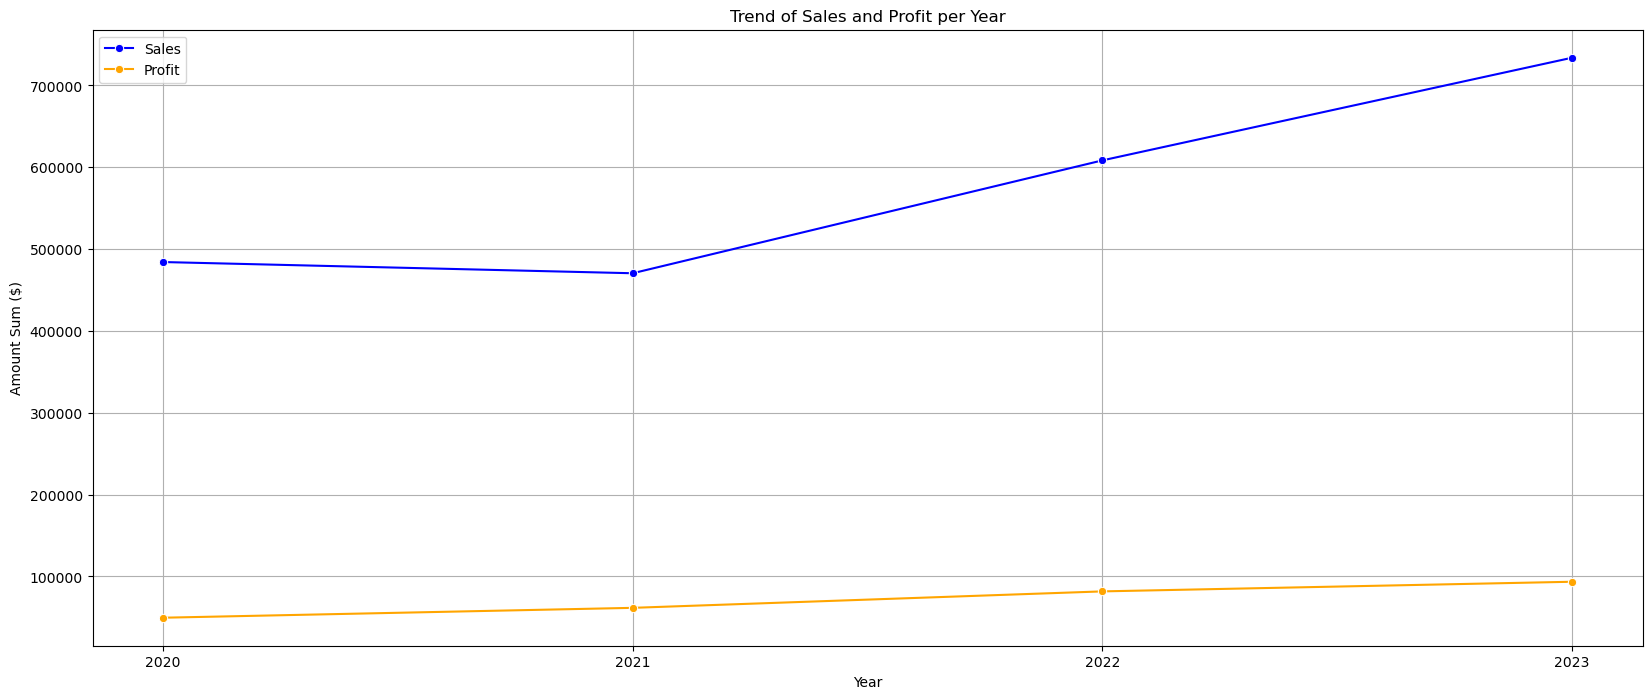

In [19]:
plt.figure(figsize=(20, 8))
sns.lineplot(data=df_1_year, x='Year', y='Sales', marker='o', label='Sales', color='blue')
sns.lineplot(data=df_1_year, x='Year', y='Profit', marker='o', label='Profit', color='orange')

plt.title('Trend of Sales and Profit per Year')
plt.xlabel('Year')
plt.ylabel('Amount Sum ($)')
plt.xticks(df_1_year['Year'])
plt.legend()
plt.grid()


#### Insight
1. 2020-2023
- **Overall Trend**: Upward trend.
    - Reason:
        - Significant increase, possibly to increased marketing efforts ,the application of promo of the  product's by potential users, and the early on of CORONA VIRUS, which make more business more digital awareness.


In [20]:
df_1_month = df_1.groupby(['Month Name', 'Year']).agg({'Sales': 'sum','Profit':'sum'}).reset_index()
#df_1_month

In [21]:
df_2020 = df_1_month[df_1_month['Year'] == 2020]
df_2021 = df_1_month[df_1_month['Year'] == 2021]
df_2022 = df_1_month[df_1_month['Year'] == 2022]
df_2023 = df_1_month[df_1_month['Year'] == 2023]
#df_2020

### S&P Monthly

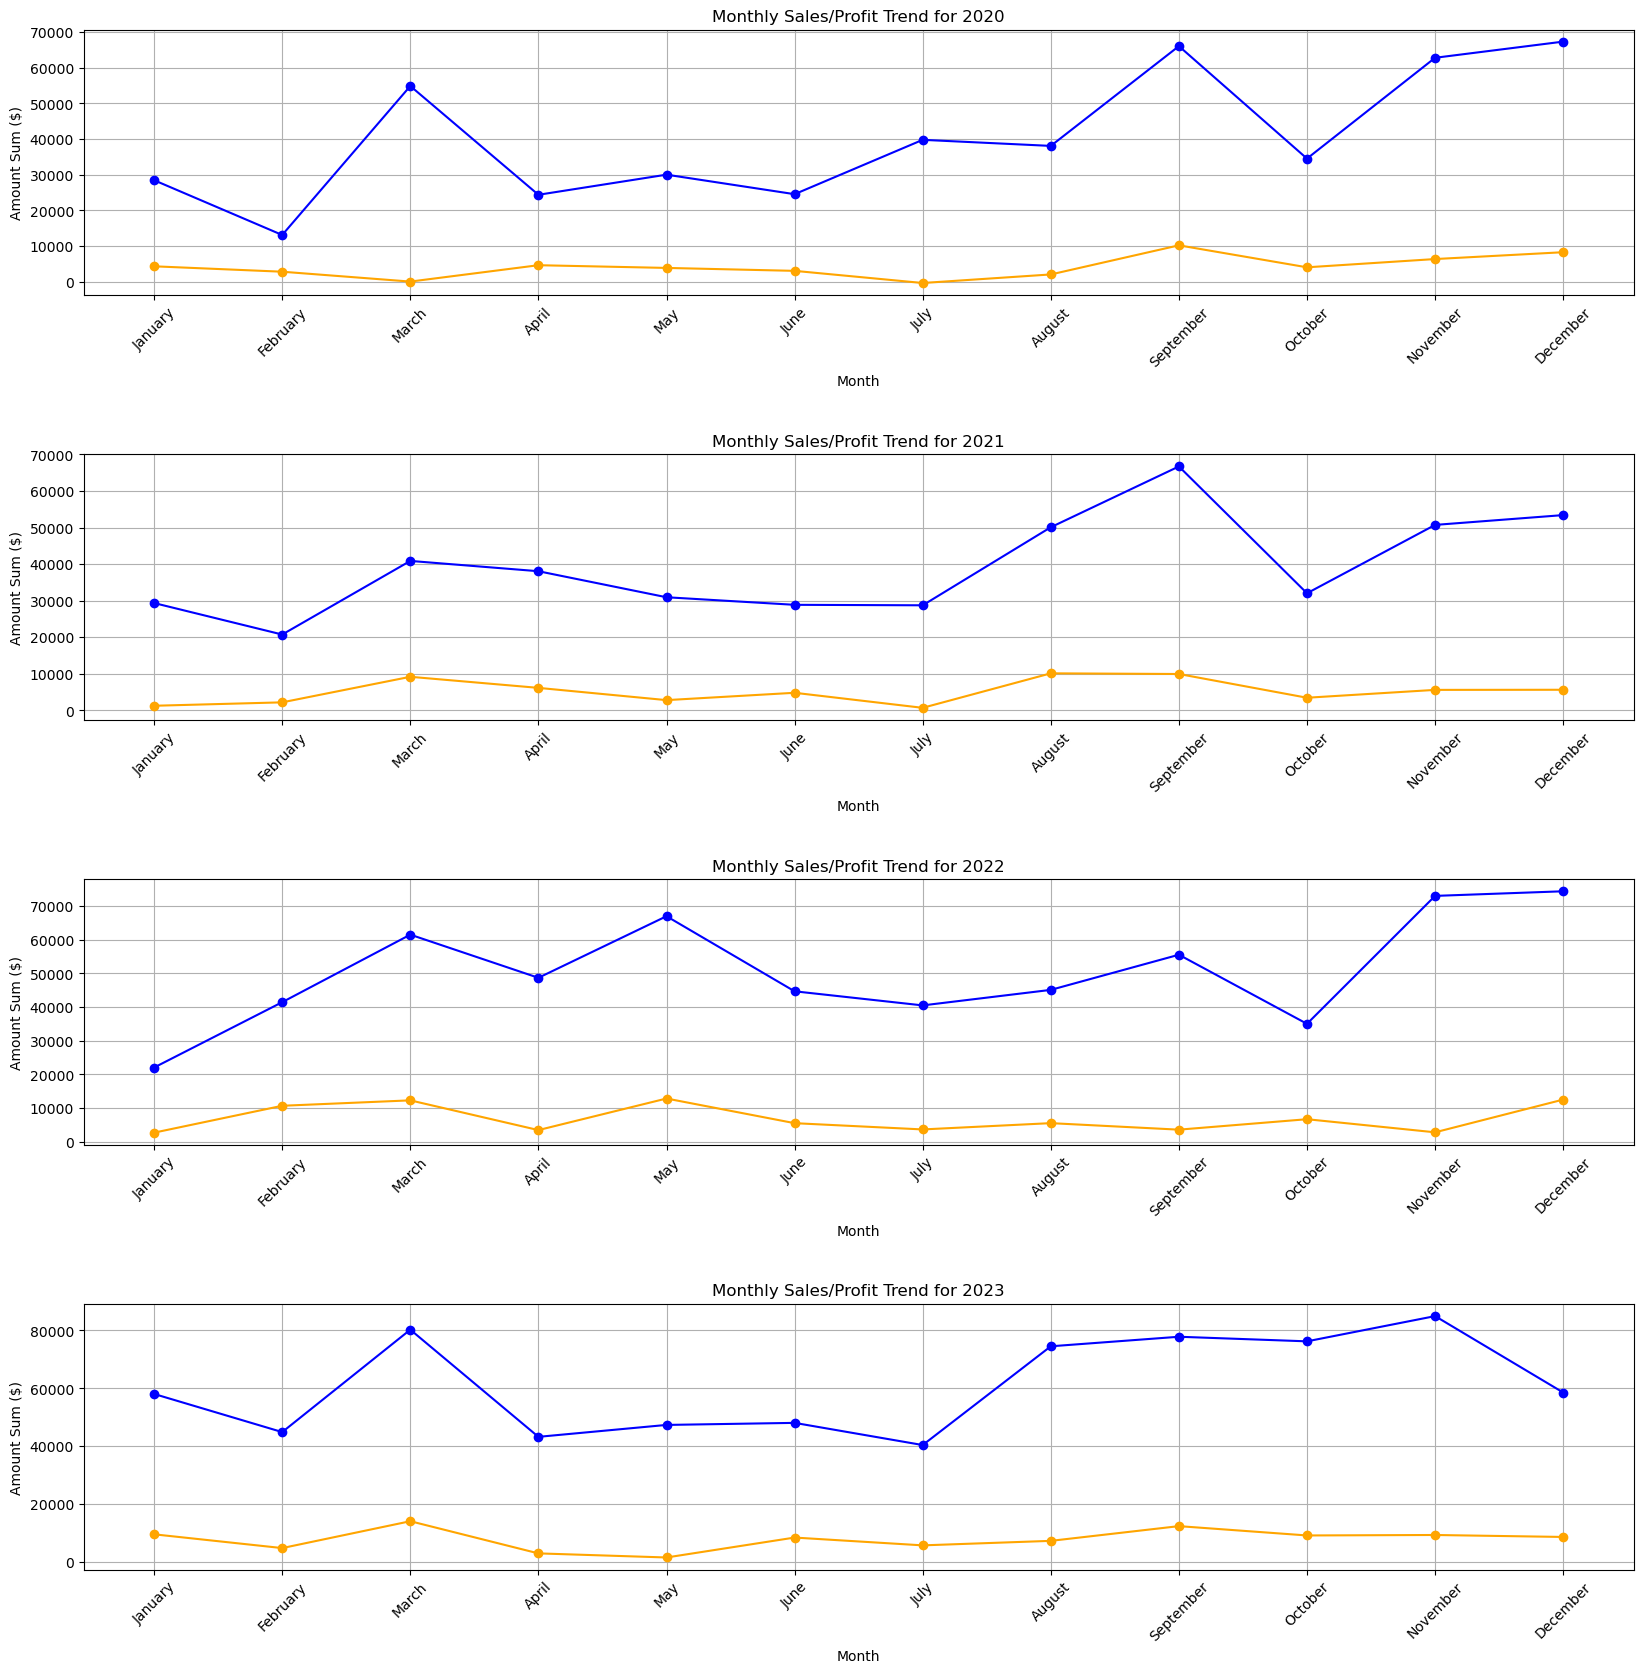

In [22]:
plt.figure(figsize=(20, 20))
plt.subplot(4, 1, 1)
plt.plot(df_2020['Month Name'], df_2020['Sales'], marker='o', label='Sales', color='blue')
plt.plot(df_2020['Month Name'], df_2020['Profit'], marker='o', label='Profit', color='orange')

plt.title('Monthly Sales/Profit Trend for 2020')
plt.xlabel('Month')
plt.ylabel('Amount Sum ($)')
plt.xticks(rotation=45)
plt.grid()

plt.subplot(4, 1, 2)
plt.plot(df_2021['Month Name'], df_2021['Sales'], marker='o', label='Sales', color='blue')
plt.plot(df_2021['Month Name'], df_2021['Profit'], marker='o', label='Profit', color='orange')

plt.title('Monthly Sales/Profit Trend for 2021')
plt.xlabel('Month')
plt.ylabel('Amount Sum ($)')
plt.xticks(rotation=45)
plt.grid()

plt.subplot(4, 1, 3)
plt.plot(df_2022['Month Name'], df_2022['Sales'], marker='o', label='Sales', color='blue')
plt.plot(df_2022['Month Name'], df_2022['Profit'], marker='o', label='Profit', color='orange')

plt.title('Monthly Sales/Profit Trend for 2022')
plt.xlabel('Month')
plt.ylabel('Amount Sum ($)')
plt.xticks(rotation=45)
plt.grid()

plt.subplot(4, 1, 4)
plt.plot(df_2023['Month Name'], df_2023['Sales'], marker='o', label='Sales', color='blue')
plt.plot(df_2023['Month Name'], df_2023['Profit'], marker='o', label='Profit', color='orange')

plt.title('Monthly Sales/Profit Trend for 2023')
plt.xlabel('Month')
plt.ylabel('Amount Sum ($)')
plt.xticks(rotation=45)
plt.grid()

plt.subplots_adjust(hspace=0.6)


#### Insight

- Blue Line = Sales
- Yellow Line = Profit

1. 2020:
- **Overall Trend**: Upward trend.
    - Reason:
        - **Early months (January-April)** = Slow growth, likely due to low market awareness of the AWS SaaS product.
        - **Mid-year (May-August)** = Significant increase, possibly to increased marketing efforts ,the application of promo of the  product's by potential users, and the early on of CORONA VIRUS, which make more business more digital awareness.
        - **Late months (September-December)** = Stabilization, with slight growth, indicating a mature market and established user base.

2. 2021:

- **Overall Trend**: Upward trend.
    - Reason:
        - **Early months (January-April)** = Steady growth indicating continued market and user base expansion.
        - **Mid-year (May-August)** = Slight decline, possibly influenced by economic factors which after effect of COVID 19 or competitors' promotional campaigns such as
            - AWS SaaS                  
            1. Microsoft SaaS/Azure     
            2. Google SaaS              
            3. etc.
        - **Late months (September-December)** = Strong growth, suggesting successful recovery from the mid-year slump and increased demand for the product.

3. 2022:

- **Overall Trend**: Upward trend, with fluctuations through the year.
    - Reason:
        - **Early months (January-April)** = Steady growth, demonstrating continued product adoption and user acquisition.
        - **Mid-year (May-August)** = Slight decline, potentially influenced by seasonal factors, economic uncertainty, or competition.
        - **Late months (September-December)** = Rapid growth maybe almost for real driven by strong marketing efforts, new product features, and increased demand for cloud services.

4. 2023:

- **Overall Trend**: Upward trend, with significant growth in the latter half of the year.
    - Reason:
        - **Early months (January-April)** = Stable growth, showcasing continued user engagement and product acceptance.
        - **Mid-year (May-August)** = Slight decline, likely due to seasonal trends or competitor strategies.
        - **Late months (September-December)** = Strong growth, driven by successful product updates, marketing campaigns, and increased demand for AWS SaaS solutions



- Overall The trend through the year and month are stable, but we also need to consider the up and down trend, we need to find **chance to improve** our profit and engagement, in this data the **factor** that could be **affect** **Profit and engagement**, are **DISCOUNT** therefore
---

## 2. Discount Strategy

    - Correlation of discounts with sales profit quantity  (Correlation Heatmap)

using median because our data are not distibute normal

In [23]:
df_group_discount_median = df.groupby('Region')[['Discount Nominal']].median()
df_group_discount_median

,Discount Nominal
Region,
AMER,0.0000
APJ,13.8816
EMEA,0.0000


But if we use median, it only show agg median of discount Nominal for APJ, this happen because in AMER and EMEA rarely apply discount in their transaction, because of this we will try to use agg mean of discount Nominal

In [24]:
df_group_discount_mean = df.groupby('Region')[['Discount Nominal']].mean() 
df_group_discount_mean

,Discount Nominal
Region,
AMER,138.045507
APJ,181.113909
EMEA,167.288695


### Insight
1. From group by we could see region APJ are the region who mostly apply discount in their region, because of that when we calculate correlation value we will focus on APJ which region who moslty use Discount

### HeatMAP

Method Spearman being used, because our data is not normal distribution, already explain in Data Structure

In [25]:
df_discount_apj = df[df['Region']=='APJ']
df_discount_apj = df_discount_apj[['Discount Nominal','Sales','Quantity','Profit']]
df_discount_apj

,Discount Nominal,Sales,Quantity,Profit
14,275.240000,68.8100,5,-123.8580
15,6.105600,2.5440,3,-3.8160
34,17.683200,29.4720,3,9.9468
35,1536.561600,1097.5440,7,123.4737
36,572.760000,190.9200,5,-147.9630
...,...,...,...,...
9962,490.835968,383.4656,4,-67.6704
9964,0.000000,13.4000,1,6.4320
9965,0.000000,4.9800,1,2.3406
9966,0.000000,109.6900,7,51.5543


Method Spearman being used, because our data is not normal distribution, already explain in Data Structure

In [26]:
df_corr_table = df_discount_apj.corr(method='spearman') 
df_corr_table

,Discount Nominal,Sales,Quantity,Profit
Discount Nominal,1.000000,0.367802,0.286801,-0.445940
Sales,0.367802,1.000000,0.310495,0.301904
Quantity,0.286801,0.310495,1.000000,0.103755
Profit,-0.445940,0.301904,0.103755,1.000000


we will use triu so our result of heatmap only show triangle in bottom

In [27]:
np.triu(np.ones_like(df_corr_table, dtype=bool))

array([[ True,  True,  True,  True],
       [False,  True,  True,  True],
       [False, False,  True,  True],
       [False, False, False,  True]])

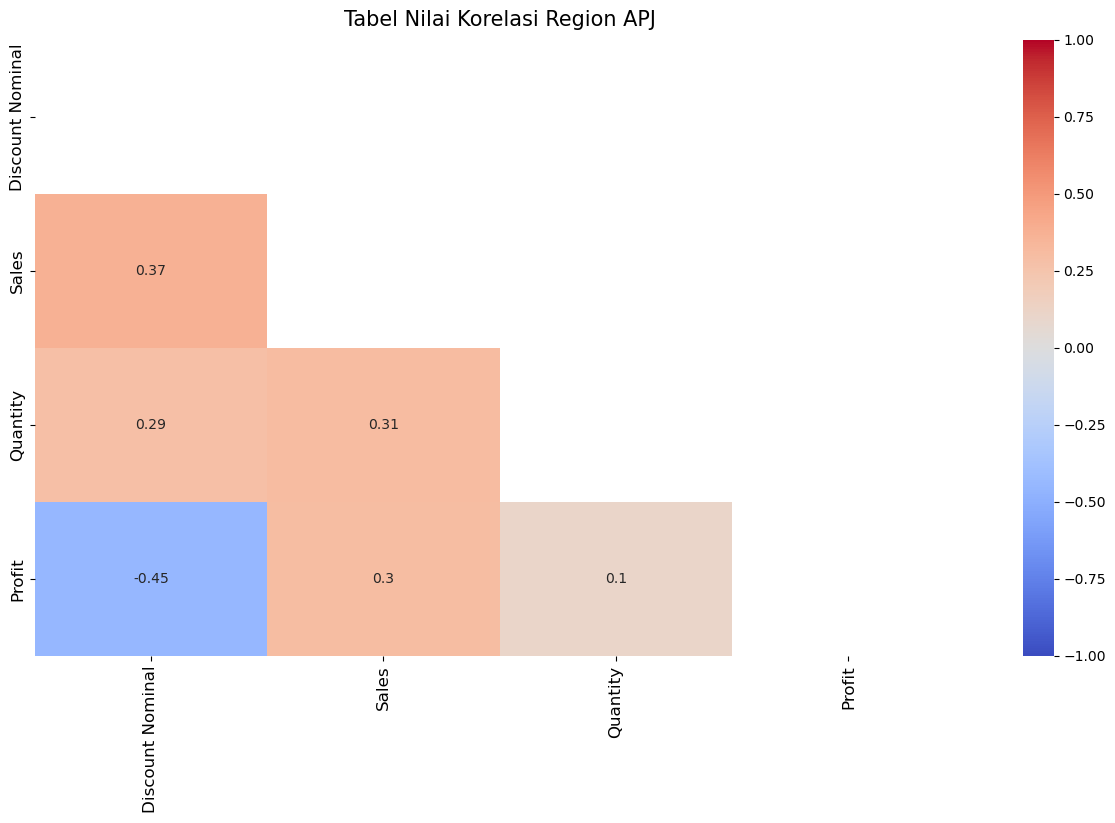

In [28]:
plt.figure(figsize=(15, 8))
plt.title('Tabel Nilai Korelasi Region APJ', pad=10, size=15)
mask = np.triu(np.ones_like(df_corr_table, dtype=bool))
sns.heatmap(data=df_corr_table,mask=mask, annot=True,center=0, cmap='coolwarm', cbar=True, vmin=-1, vmax=1)

plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)

plt.xticks(rotation=90, fontsize=12)
plt.show()

#### Insight Correlation Heatmap

- The darker the color, the stronger the positive correlation value.
- The more blue the color, the stronger the negative correlation value.
- The paler the color/cream, the weaker the correlation value.

1. There is a moderate negative correlation **(-0.45)** between Discount Nominal and Profit. This suggests that as discounts increase, profit tends to decrease, likely due to lower prices reducing overall profit margins.
2. There is a moderate positive correlation **(0.37)** between Discount Nominal and Sales. This suggests that as the discount amount increases, sales tend to increase as well.

In [29]:
df_apj_level = df_discount_apj[['Profit','Discount Nominal']]
df_apj_level['Discount Level'] = np.where(df_apj_level['Discount Nominal'] >= df_apj_level['Discount Nominal'].median(), 'High', 'Low')
df_apj_level

,Profit,Discount Nominal,Discount Level
14,-123.8580,275.240000,High
15,-3.8160,6.105600,Low
34,9.9468,17.683200,High
35,123.4737,1536.561600,High
36,-147.9630,572.760000,High
...,...,...,...
9962,-67.6704,490.835968,High
9964,6.4320,0.000000,Low
9965,2.3406,0.000000,Low
9966,51.5543,0.000000,Low


In [30]:
df_apj_level['Discount Level'].value_counts()

Discount Level
High    1055
Low     1055
Name: count, dtype: int64

After we labelled Discount that >= median as High and other is Low, now we will do Hypothesis testing to see if there is a significant difference in Profit between High and Low Discount Level

- H0 = there is a significant difference in Profit between High and Low Discount Level

### Hypothesis Testing

In [31]:
from scipy.stats import mannwhitneyu

In [32]:
df_apj_level_High = df_apj_level[df_apj_level['Discount Level'] == 'High']['Profit']
df_apj_level_Low = df_apj_level[df_apj_level['Discount Level'] == 'Low']['Profit']

In [33]:
t_stat, p_value = mannwhitneyu(
    df_apj_level_High, 
    df_apj_level_Low, 
)

In [34]:
print(f'Pvalue get {p_value}')
if p_value < 0.05:
    print(f'''
    pvalue = {p_value}. pvalue < 0.05. Reject Ho. 
    We do have enough evidence that there is significant difference in Profit between High and Low discount levels.
    ''')
else:
    print(f'''
    pvalue = {p_value}. pvalue > 0.05. Fail to Reject Ho. 
    we do NOT have enough evidence that there is NO significant difference in Profit between High and Low discount levels .
    ''')

Pvalue get 4.013451757542631e-55

    pvalue = 4.013451757542631e-55. pvalue < 0.05. Reject Ho. 
    We do have enough evidence that there is significant difference in Profit between High and Low discount levels.
    


In [35]:
df_apj_level['Discount Nominal'].median()

13.881599999999999

#### Insight Hypothesis Testing
1. Correlation result are strong negative relationship between Discount and Profit; as discounts rise, profits will decline.
2. "High" discounts (above the median) ($13.88) start to negatively affect profitability.

### Finding The Best Discount

In [36]:
df['Discount'].value_counts()

Discount
0.00    4798
0.20    3657
0.70     418
0.80     300
0.30     227
0.40     206
0.60     138
0.10      94
0.50      66
0.15      52
0.32      27
0.45      11
Name: count, dtype: int64

In [37]:
df[df['Region'] == 'APJ'][['Discount']].value_counts()

Discount
0.20        854
0.00        602
0.80        300
0.30        158
0.60        138
0.32         27
0.50         18
0.40         13
Name: count, dtype: int64

Now we will try to divided all value in discount and group them by = low (0-20%), medium (20-50%), high (50%+)

In [38]:
discount = [0, 0.3, 0.5, 1]  
labels = ['Low (0-30%)', 'Medium (30-50%)', 'High (50%+)']
df_apj = df[df['Region'] == 'APJ']
df_apj['Discount Category'] = pd.cut(df_apj['Discount'], bins=discount, labels=labels)
discount_analysis_apj = df_apj.groupby('Discount Category')[['Sales', 'Profit']].median().reset_index()
discount_analysis_apj

,Discount Category,Sales,Profit
0,Low (0-30%),56.6950,3.7638
1,Medium (30-50%),376.3324,-96.8508
2,High (50%+),11.5310,-13.8619


#### Insight The best Discount
1. "High" discounts (above the median) ($13.88) start to negatively affect profitability. --> From Hypothesis
    - Which after finding the best discount, it proven that after discount being applied 50% more it starting derived
    - While in Hypothesis we only divided discount based on `High Discount` and `Low Discount` , for this testing we divided into 3
        - low (0-20%), medium (20-50%), high (50%+)
2. The best Discount for being Applied in region APJ are Low(0-20%) which you can choose whethener discound from 
    - Discount that you can applied = 0 %, 20 %, and 30 %
    

### The Best Spedcific Discount

In [39]:
specific_discounts = [0.0, 0.2, 0.3]
df_specific_discounts = df_apj[df_apj['Discount'].isin(specific_discounts)]
discount_analysis_specific = (df_specific_discounts.groupby('Discount')[['Sales', 'Profit']].median())
discount_analysis_specific = discount_analysis_specific.reset_index()
discount_analysis_specific

,Discount,Sales,Profit
0,0.0,67.800,20.32790
1,0.2,39.984,5.44320
2,0.3,359.415,-29.12985


#### Insight The best Applied Discound
1. "High" discounts (above the median) ($13.88) start to negatively affect profitability. --> From Hypothesis
    - Which after finding the best discount, it proven that after discount being applied 50% more it starting derived
    - While in Hypothesis we only divided discount based on `High Discount` and `Low Discount` , for this testing we divided into 3
        - low (0-20%), medium (20-50%), high (50%+)
2. The best Discount for being Applied in region APJ are Low(0-20%) which you can choose whethener discound from 
    - Discount that you can applied = 0 %, 20 % and 30% 
- New Insight
3. From the table we can see when we dont applied any discount(0%) the profit start with $20.32790, when we choose to applied discount (0.2/20%) it start change the profit from 20 to 5 which decrese $15 profit, but the discount are being use as a part of **PROMO ENGAGEMENT** that the company do, so now we will check the other discount (0.3/30%) is decrese much further to -29 which the gap from 20% are $24, so the best discount the company can be applied are 20 % or below.


---

## 3. Customer, Product, Region, and Segmen

    - Which product is the most profitable by customer? (Top 10 Bar Plot)
    - How is the profit gap (Margin) by customer? (Line Plot/Bar Plot)
    - The highest-selling product? (Top 10 bar Plot)
    - The highest-selling, Profit & Margin by region? (Top 10 bar Plot)
    - The highest-selling, Profit & Margin by segmen? (Top 10 bar Plot)
    - RFM
    - ChurnRate

In [40]:
df_4 = df[['Customer','Sales','Profit','Margin','Industry','Segment','Product']]
df_4 = df_4.sort_values(by='Profit', ascending=False).head(10)
df_4

,Customer,Sales,Profit,Margin,Industry,Segment,Product
6826,Coca-Cola,17499.950,8399.9760,4031.988480,Consumer Products,Strategic,Alchemy
8153,Mondelez International,13999.960,6719.9808,3225.590784,Consumer Products,SMB,Alchemy
4190,Lowes,10499.970,5039.9856,2419.193088,Retail,SMB,Alchemy
9039,Valero Energy,9892.740,4946.3700,2473.185000,Energy,SMB,ContactMatcher
4098,Anthem,9449.950,4630.4755,2268.932995,Healthcare,SMB,ContactMatcher
2623,Trafigura Group,11199.968,3919.9888,6859.980400,Finance,Enterprise,Alchemy
509,Lukoil,6354.950,3177.4750,1588.737500,Energy,SMB,ContactMatcher
8488,Honda Motor,8749.950,2799.9840,895.994880,Manufacturing,SMB,Big Ol Database
7666,Glencore,5399.910,2591.9568,1244.139264,Misc,Enterprise,Alchemy
6520,Alphabet,5443.960,2504.2216,1151.941936,Tech,SMB,ContactMatcher


### Top 10 Customer By Sales, Profit, and Margin

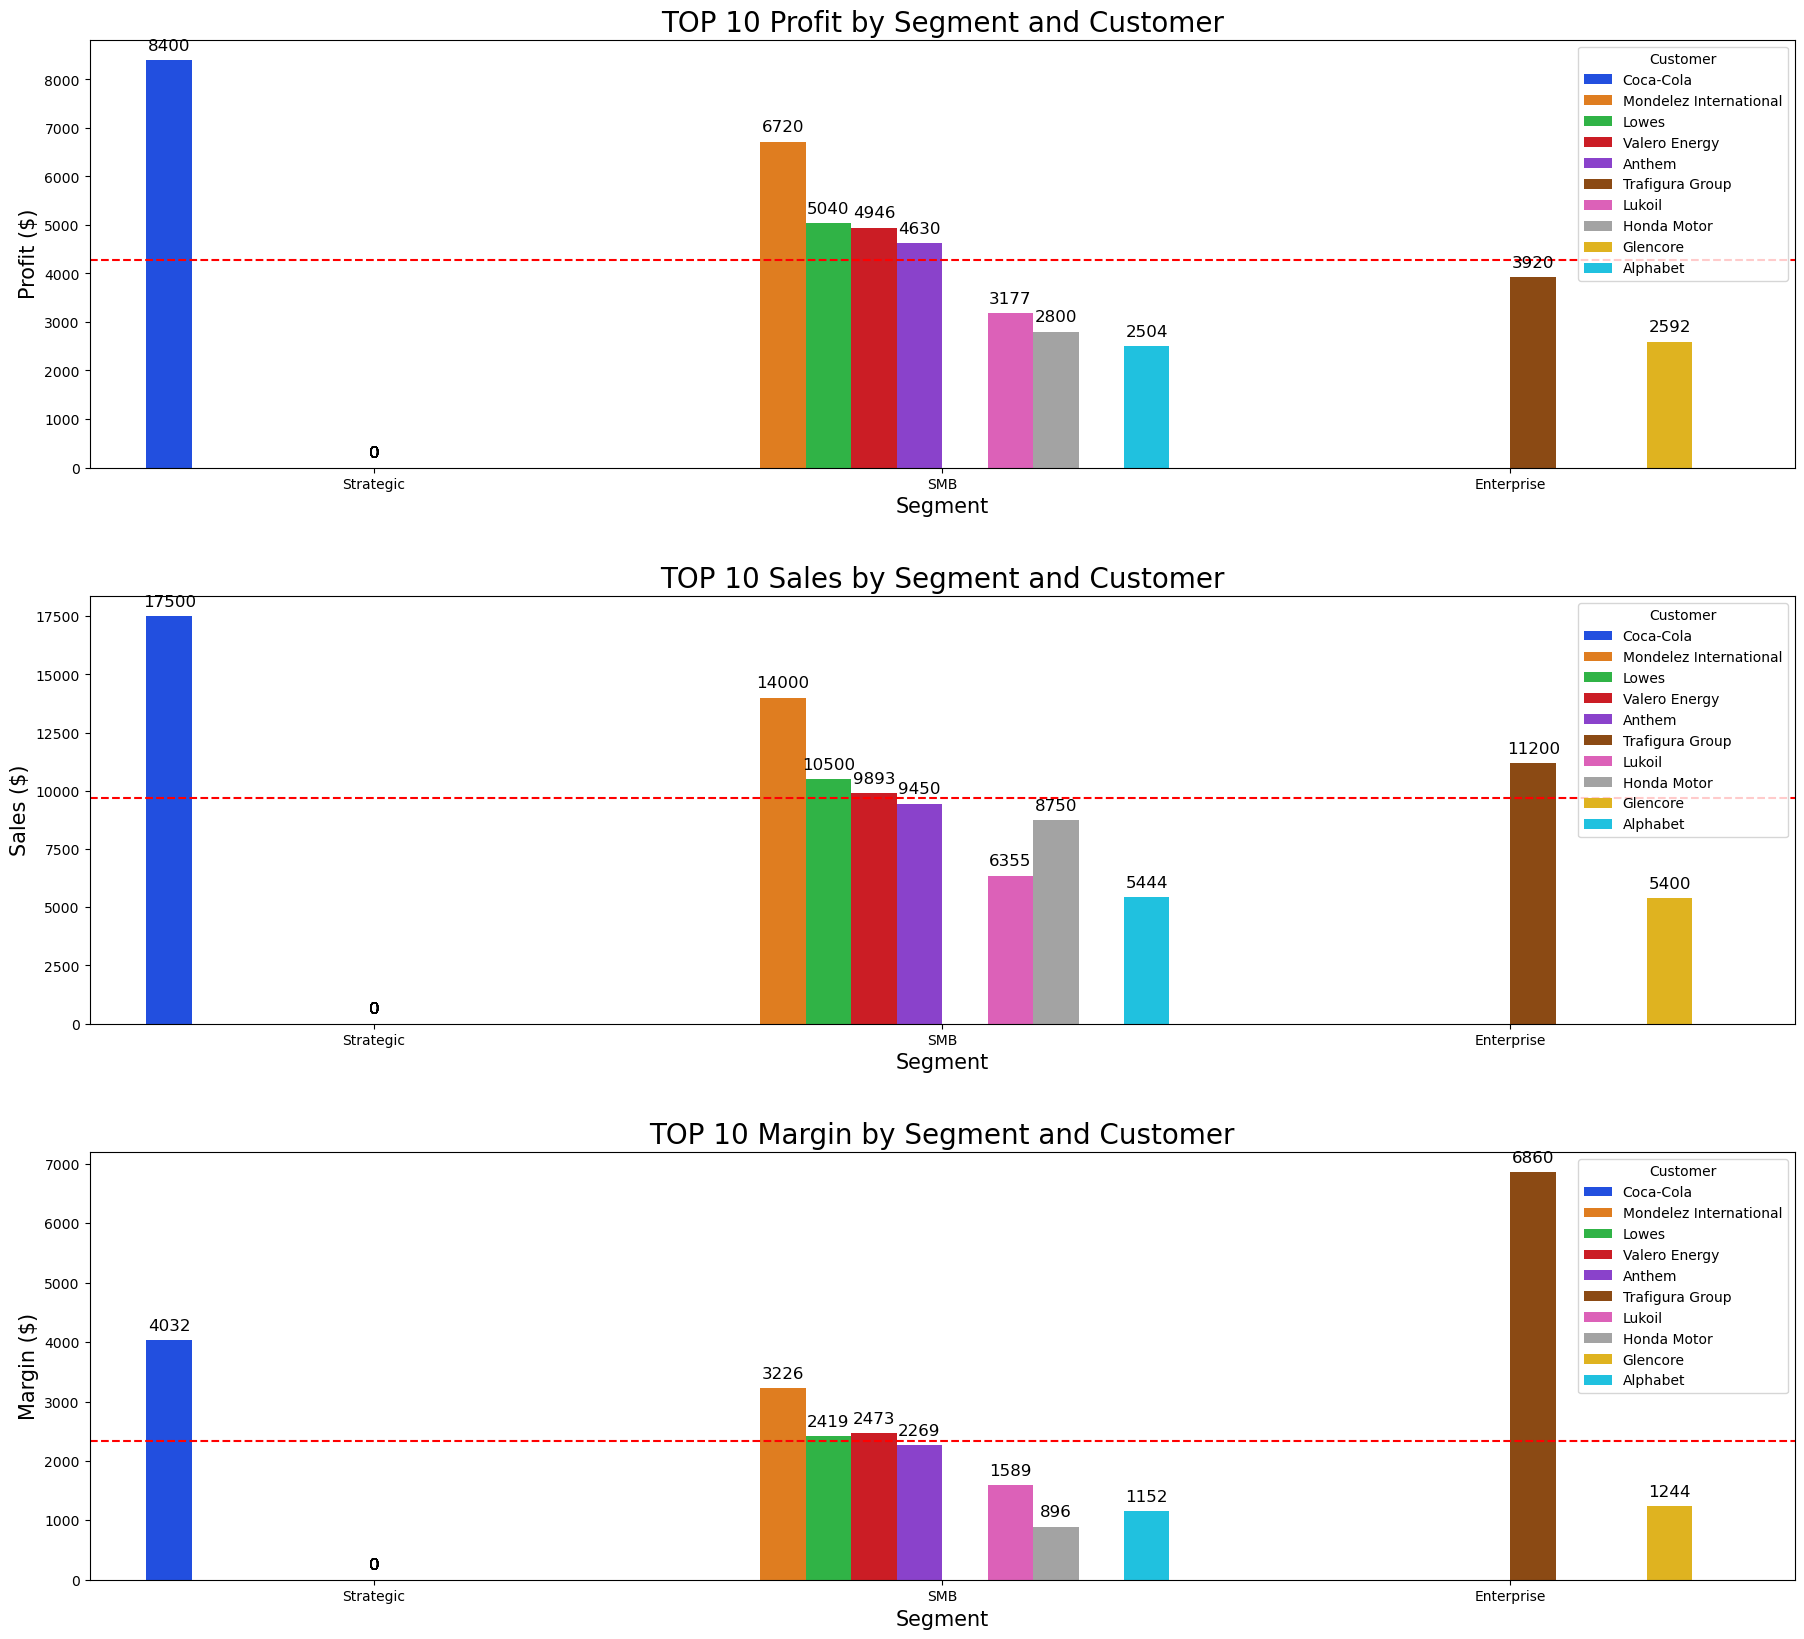

In [41]:
plt.figure(figsize=(22,20))
plt.subplot(3, 1, 1)
bar_plot = sns.barplot(data=df_4, x='Segment', y='Profit', hue='Customer', palette='bright')
for p in bar_plot.patches:
    bar_plot.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='bottom', fontsize=12, color='black', xytext=(0, 5), 
                      textcoords='offset points')
    
median_profit = df_4['Profit'].median()
plt.axhline(y=median_profit, color='red', linestyle='--', label='Median Profit')
    
plt.title('TOP 10 Profit by Segment and Customer', size=20)
plt.xlabel('Segment', size=15)
plt.ylabel('Profit ($)', size=15)

plt.subplot(3, 1, 2)
bar_plot = sns.barplot(data=df_4, x='Segment', y='Sales', hue='Customer', palette='bright')
for p in bar_plot.patches:
    bar_plot.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='bottom', fontsize=12, color='black', xytext=(0, 5), 
                      textcoords='offset points')
    
median_profit = df_4['Sales'].median()
plt.axhline(y=median_profit, color='red', linestyle='--', label='Median Sales')
    
plt.title('TOP 10 Sales by Segment and Customer', size=20)
plt.xlabel('Segment', size=15)
plt.ylabel('Sales ($)', size=15)

plt.subplot(3, 1, 3)
bar_plot = sns.barplot(data=df_4, x='Segment', y='Margin', hue='Customer', palette='bright')
for p in bar_plot.patches:
    bar_plot.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='bottom', fontsize=12, color='black', xytext=(0, 5), 
                      textcoords='offset points')
    
median_profit = df_4['Margin'].median()
plt.axhline(y=median_profit, color='red', linestyle='--', label='Median Margin')
    
plt.title('TOP 10 Margin by Segment and Customer', size=20)
plt.xlabel('Segment', size=15)
plt.ylabel('Margin ($)', size=15)

plt.subplots_adjust(hspace=0.3)

#### Insight
1. TOP 10 Customer by Profit
    - With Median as average limit, we could see Coca Cola place 1st with total profit they give is $8400, followed by
    - 
    
        2. Mondales International   ($6720)
        3. Lowes                    ($5040)
        4. Valero Energy            ($4949)
        5. Antehm                   ($4630)
   
2. TOP 10 Customer by Sales
    - With Median as average limit, we could see Coca Cola place 1st with total Sales they give is $17500, followed by
    - 
    
        2. Mondales International   ($14000)
        3. Trafigura Group          ($11200)
        4. Lowes                    ($10500)
        5. Valero Energy            ($9893)
3. TOP 10 Customer by Margin
    - With Median as average limit, we could see Trafigura Group place 1st with total Margin they give is $6860, followed by
    - 
    
        2. Coca Cola                ($4023)
        3. Mondales International   ($3226)
        4. Valero Energy            ($2473)
        5. Lowes                    ($2419)

Conclusion : 
 - While other customer fall behind the average median, it doesnt mean bad, They still provide greater profits,Sales, and Margin than other customers
    which could still be potential customer for our other product
    - But still the reason why the of TOP 10 is not good as expected as the lowest profit is ($2504), sales is ($5400), and margin is ($896) could be due to several factors such as
    - 
    
        1. Increased PRODUCT PRICE because they want to compete with competitors but do not meet expectations
        2. Fierce competition between competitors, as we know microsoft, goolgle , etc also have their own SaaS as their Services,So that it causes a decrease in product prices to attract customers, this price decrease is also what causes a decrease in profit turnover
        3. Changes in customer preferences and behavior can affect profit. If businesses cannot adapt to these changes, profits can be affected.
        4. If the marketing strategy does not reach the target market well, sales can decrease. Ineffective marketing can lead to low turnover, which leads to small profits, sales, and margin

### Highest Product Profit,Sales, and Margin

In [42]:
df_top_product = df.groupby('Product')[['Profit']].sum()
df_top_product = df_top_product.reset_index()
df_top_product = df_top_product.rename(columns={'Profit':'Total Profit'})
df_top_product = df_top_product.sort_values(by='Total Profit', ascending=False)
df_top_product

df_Sal_product = df.groupby('Product')[['Sales']].sum()
df_Sal_product = df_Sal_product.reset_index()
df_Sal_product = df_Sal_product.rename(columns={'Sales':'Total Sales'})
df_Sal_product = df_Sal_product.sort_values(by='Total Sales', ascending=False)
df_Sal_product

df_Mar_product = df.groupby('Product')[['Margin']].sum()
df_Mar_product = df_Mar_product.reset_index()
df_Mar_product = df_Mar_product.rename(columns={'Margin':'Total Margin'})
df_Mar_product = df_Mar_product.sort_values(by='Total Margin', ascending=False)
df_Mar_product

display(df_top_product,df_Sal_product, df_Mar_product)

,Product,Total Profit
0,Alchemy,55617.8249
11,Site Analytics,44515.7306
4,Data Smasher,41936.6357
13,Support,32864.4698
5,FinanceHub,32136.4203
7,Marketing Suite - Gold,21278.8264
8,OneView,18138.0054
9,SaaS Connector Pack,13059.1436
3,ContactMatcher,12496.2822
10,SaaS Connector Pack - Gold,6964.1767


,Product,Total Sales
3,ContactMatcher,410378.2650
5,FinanceHub,340935.4150
11,Site Analytics,330007.0540
7,Marketing Suite - Gold,223843.6080
1,Big Ol Database,189238.6310
4,Data Smasher,167380.3180
0,Alchemy,149528.0300
13,Support,125152.7440
6,Marketing Suite,114879.9963
8,OneView,107532.1610


,Product,Total Margin
3,ContactMatcher,44087.382358
0,Alchemy,28020.684638
13,Support,17435.817994
5,FinanceHub,15627.314986
11,Site Analytics,15192.375285
4,Data Smasher,14187.886404
1,Big Ol Database,14104.406468
8,OneView,10573.701944
7,Marketing Suite - Gold,7900.411309
9,SaaS Connector Pack,6618.792588


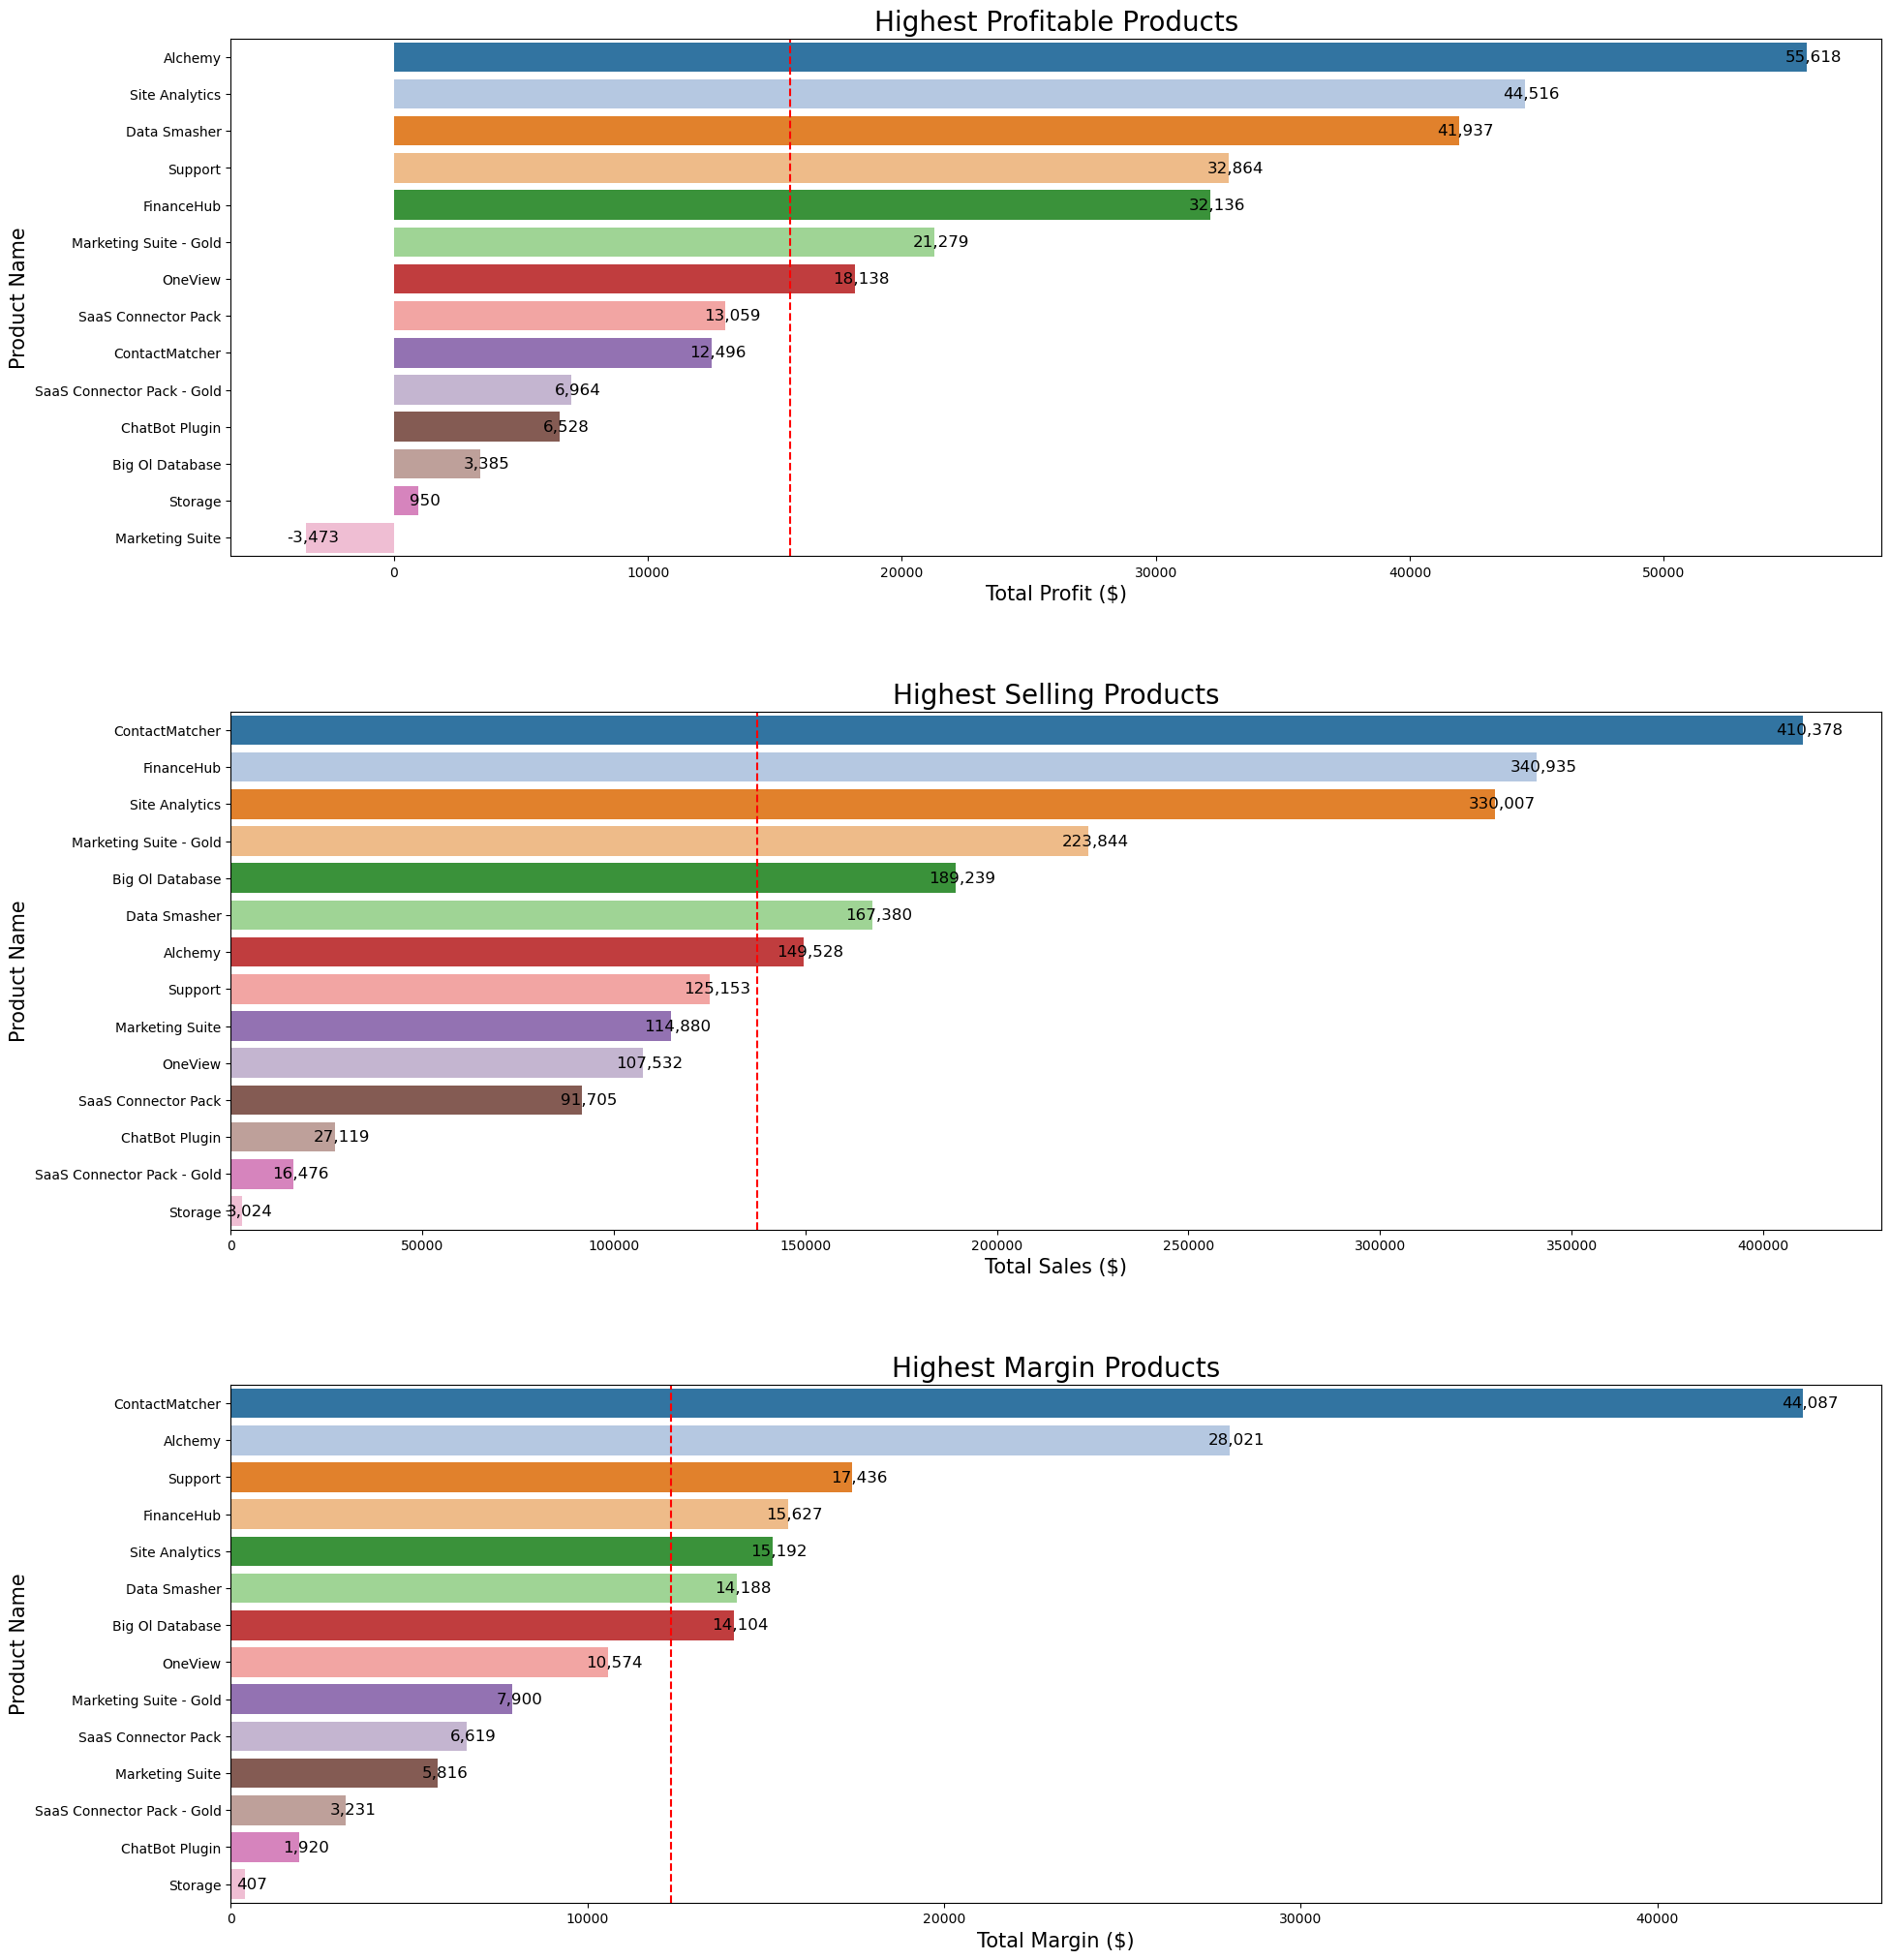

In [43]:
plt.figure(figsize=(22, 25))

plt.subplot(3, 1, 1)
bar_plot_top = sns.barplot(data=df_top_product, x='Total Profit', y='Product', palette='tab20')

for p in bar_plot_top.patches:
    bar_plot_top.annotate(f'{p.get_width():,.0f}', (p.get_width(), p.get_y() + p.get_height() / 2),
                          ha='center', va='center', fontsize=12, color='black', xytext=(5, 0), 
                          textcoords='offset points')
    
median_profit = df_top_product['Total Profit'].median()
plt.axvline(x=median_profit, color='red', linestyle='--', label='Median Profit')

plt.title('Highest Profitable Products', size=20)
plt.xlabel('Total Profit ($)', size=15)
plt.ylabel('Product Name', size=15)

plt.subplot(3, 1, 2)
bar_plot_top = sns.barplot(data=df_Sal_product, x='Total Sales', y='Product', palette='tab20')

for p in bar_plot_top.patches:
    bar_plot_top.annotate(f'{p.get_width():,.0f}', (p.get_width(), p.get_y() + p.get_height() / 2),
                          ha='center', va='center', fontsize=12, color='black', xytext=(5, 0), 
                          textcoords='offset points')
    
median_sales = df_Sal_product['Total Sales'].median()
plt.axvline(x=median_sales, color='red', linestyle='--', label='Median Sales')

plt.title('Highest Selling Products', size=20)
plt.xlabel('Total Sales ($)', size=15)
plt.ylabel('Product Name', size=15)

plt.subplot(3, 1, 3)
bar_plot_top = sns.barplot(data=df_Mar_product, x='Total Margin', y='Product', palette='tab20')

for p in bar_plot_top.patches:
    bar_plot_top.annotate(f'{p.get_width():,.0f}', (p.get_width(), p.get_y() + p.get_height() / 2),
                          ha='center', va='center', fontsize=12, color='black', xytext=(5, 0), 
                          textcoords='offset points')
    
median_margin = df_Mar_product['Total Margin'].median()
plt.axvline(x=median_margin, color='red', linestyle='--', label='Median Margin')

plt.title('Highest Margin Products', size=20)
plt.xlabel('Total Margin ($)', size=15)
plt.ylabel('Product Name', size=15)

plt.subplots_adjust(hspace=0.3)

#### Insight
1. Top Product by Profit
    - With Median as average limit, we could see Alchemy place 1st with total profit they give is $55.168, followed by
            - 
        
            2. Site Analythics          ($44.516)
            3. Data Smasher             ($41.937)
            4. Support                  ($32.865)
            5. FinanceHub               ($32.136)
            6. Marketing Suite - Gold   ($21.279)
            7. OneView                  ($18.138)
2. Top Product by Sales
    - With Median as average limit, we could see Contact Matcher place 1st with total profit they give is $410.378, followed by
            - 
            
            2. FinanceHub               ($340.935)
            3. Site Analythics          ($330.007)
            4. Marketing Suite - Gold   ($223.844)
            5. Big OL Data              ($189.239)
            6. Data Smasher             ($167.380)
            7. Alchemy                  ($149.528)
3. Top Product by Margin
    - With Median as average limit, we could see Contact Matcher place 1st with total profit they give is $44.097, followed by
            - 
        
            2. Alchemy                  ($28.021)
            3. Support                  ($17.436)
            4. FinanceHub               ($15.627)
            5. Site Analythics          ($15.192)
            6. Data Smasher             ($14.188)
            7. Big OL Data              ($14.104)

Conclusion : 
 - While other Product fall behind the average median, it doesnt mean bad, They still provide greater profits,Sales and Margin for Company
    - But still the reason why the of statistic is not good as expected as the lowest profit is even mines (-$3.473) from Marketing Suite, sales is ($3024) from Storage, and margin is ($407) from Storage could be due to several factors such as. 
            -

            1. Even though Product marketing Suite have mines profit (-$3.473) but also have margin positive ($5.816) this potentialy could happen because in visualization using barchart, use sum as aggregate this trigger 2 condition when The total of profits is more negative than the positive value of profits, while the The Total margin is based on formula profit/sales * profit, because of this the margin in this data have more positive value then negative one
            2. The product may have a good margin, but if the sales volume is low, the total profit can remain negative. This indicates that although each unit sold is profitable, not enough units sold to cover the fixed cost.
            3.  If a product is sold at a large discount to attract customers, this could reduce total revenue even if the margin per unit remains positive. This can lead to negative profits if the discount is too large.
    - Although it looks statistically bad, there are also possibilities such as
            -

            1. This situation could indicate that the product may have the potential to generate profits in the future if sales volume increases or costs can be controlled. A positive margin indicates that the product has the potential to be profitable if managed properly.

### Top Region By Profit, Sales, Margin

In [44]:
df_top_region = df.groupby('Region')[['Profit','Sales','Margin']].sum()
df_top_region = df_top_region.reset_index()
df_top_region = df_top_region.rename(columns={'Profit':'Total Profit','Sales':'Total Sales','Margin':'Total Margin'})
df_top_region = df_top_region.sort_values(by='Total Profit', ascending=False)

display(df_top_region)

,Region,Total Profit,Total Sales,Total Margin
2,EMEA,147456.0450,1.043887e+06,91333.281774
0,AMER,127426.9898,8.378496e+05,57172.170832
1,APJ,11513.9869,4.154642e+05,36615.770012


Text(0, 0.5, 'Total Margin ($)')

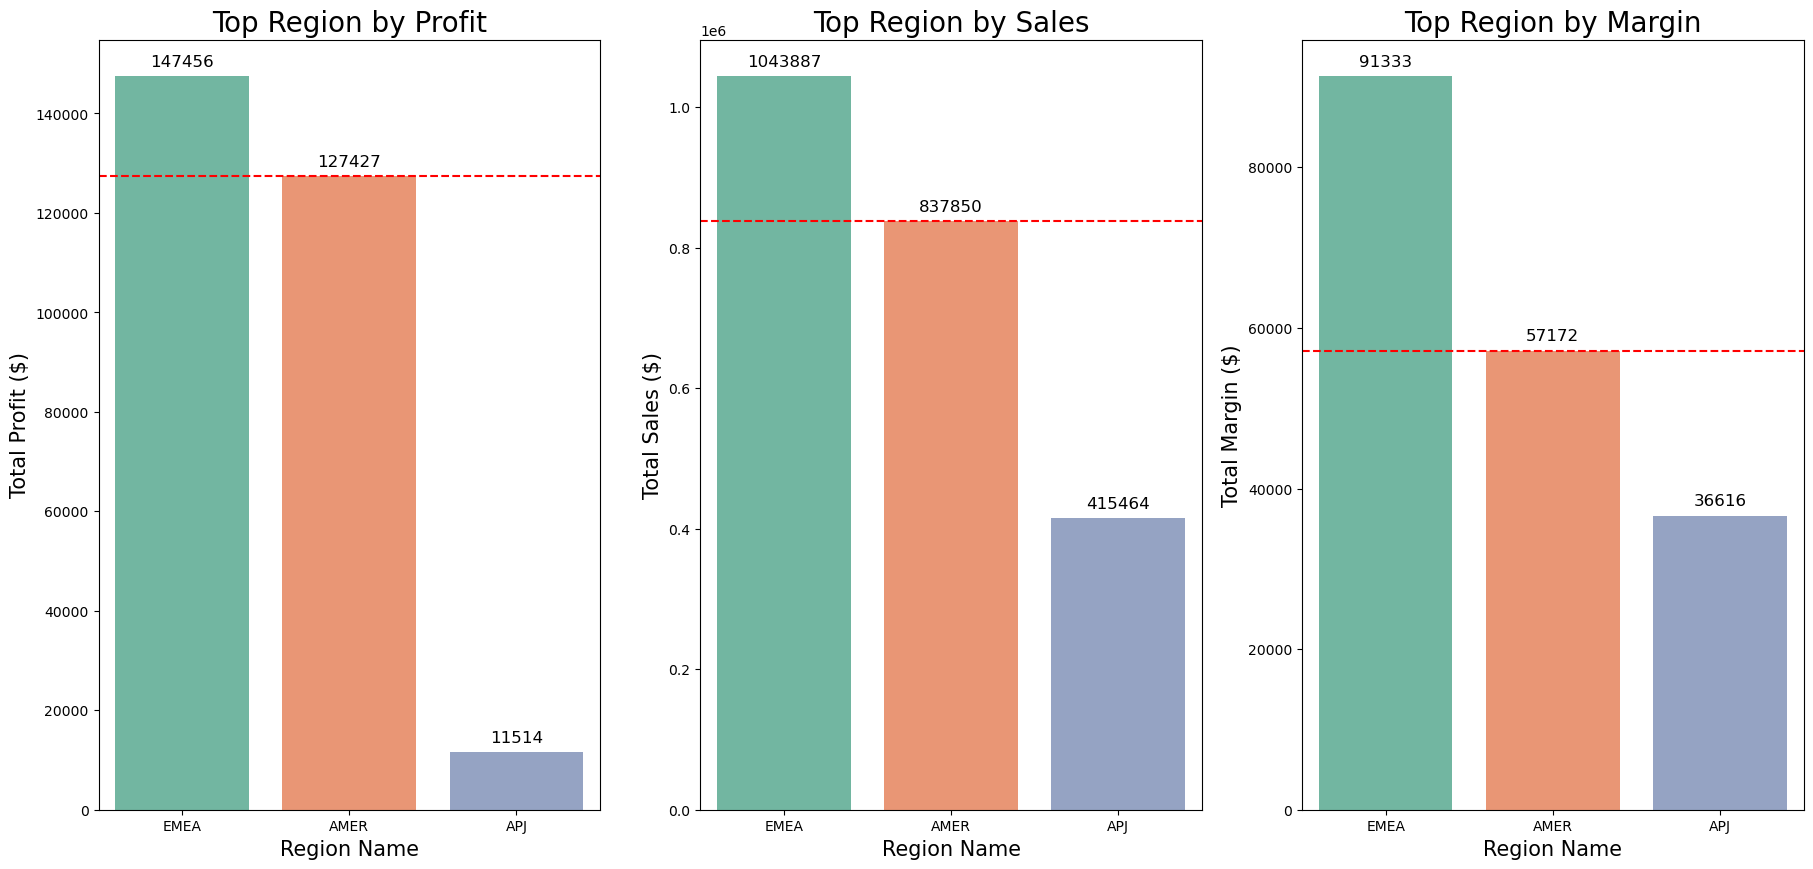

In [45]:
plt.figure(figsize=(22,10))
plt.subplot(1, 3, 1)
bar_plot = sns.barplot(data=df_top_region, x='Region', y='Total Profit', palette='Set2')
for p in bar_plot.patches:
    bar_plot.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='bottom', fontsize=12, color='black', xytext=(0, 5), 
                      textcoords='offset points')
    
median_profit = df_top_region['Total Profit'].median()
plt.axhline(y=median_profit, color='red', linestyle='--', label='Median Profit')
    
plt.title('Top Region by Profit', size=20)
plt.xlabel('Region Name', size=15)
plt.ylabel('Total Profit ($)', size=15)

plt.subplot(1, 3, 2)
bar_plot = sns.barplot(data=df_top_region, x='Region', y='Total Sales', palette='Set2')
for p in bar_plot.patches:
    bar_plot.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='bottom', fontsize=12, color='black', xytext=(0, 5), 
                      textcoords='offset points')
    
median_sales = df_top_region['Total Sales'].median()
plt.axhline(y=median_sales, color='red', linestyle='--', label='Median Sales')
    
plt.title('Top Region by Sales', size=20)
plt.xlabel('Region Name', size=15)
plt.ylabel('Total Sales ($)', size=15)

plt.subplot(1, 3, 3)
bar_plot = sns.barplot(data=df_top_region, x='Region', y='Total Margin', palette='Set2')
for p in bar_plot.patches:
    bar_plot.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='bottom', fontsize=12, color='black', xytext=(0, 5), 
                      textcoords='offset points')
    
median_margin = df_top_region['Total Margin'].median()
plt.axhline(y=median_margin, color='red', linestyle='--', label='Median Margin')
    
plt.title('Top Region by Margin', size=20)
plt.xlabel('Region Name', size=15)
plt.ylabel('Total Margin ($)', size=15)

#### Insight
1. Top Region by Profit
    - With Median as average limit, we could see EMEA place 1st with total profit they give is $55.168, followed by
            - 
        
            2. AMER                     ($44.516)
            3. APJ                      ($41.937)
            
2. Top Region by Sales
    - With Median as average limit, we could see EMEA place 1st with total profit they give is $410.378, followed by
            - 
            
            2. AMER                     ($340.935)
            3. APJ                      ($330.007)
            
3. Top Region by Margin
    - With Median as average limit, we could see EMEA place 1st with total profit they give is $44.097, followed by
            - 
        
            2. AMER                     ($28.021)
            3. APJ                      ($17.436)

Conclusion : 
 - While other Region fall is above or in the average median, APJ are fall behind in all metric, either way profit, sales or Margin.
    - The reason why the of statistic is not good as expected as the lowest profit is ($11.514), sales is ($415.464), and margin is ($36.616)  could be due to several factors such as. 
            -

        1. APJ has experienced prolonged periods of stagflation, which affects consumer spending and business investment. This stagnation can lead to lower sales and profit margins compared to more dynamic regions like EMEA and AMER.
        - for example Japan has face problem of GDP Growth from 2020 - 2023, and recent year only get 2.6 rate
        - Indonesia also face some problem in 2020-2023, with recent year only get 3.7 rate
        - Korea recent year also only get 4.3 rate
        - and The biggest country in APJ which is China get 2.2 rate in 2020 but manage to pull 5.4 rate in recent year
        2. APJ may lag in adopting new technologies and innovative practices compared to EMEA and AMER. This can affect productivity  and the ability to capture new market opportunities.
        3. A complex regulatory environment in some APJ countries can create barriers to entry and increase compliance costs, impacting overall profitability.
         
        - Indonesia 
        1. Law No. 7 of 2014 on Trade: Regulates various aspects of trade that can create difficulties for business actors, including complex permit and licensing requirements.
        2. Requirements to meet SNI can be a barrier for foreign products that want to enter the Indonesian market, due to the lengthy certification and testing process.
        3. High tax policies and strict import duties can increase costs for foreign companies, reducing their competitiveness in the local market.
        - Japan 
        1. Japan has very strict environmental regulations, which can be challenging for companies looking to operate in the industrial sector.
        2. The process of obtaining permits and licenses in Japan is often time-consuming and requires a lot of paperwork, which can hinder foreign investment.
        - Korea 
        1. South Korea has strict regulations regarding technology and innovation, which can restrict access for foreign companies looking to invest in the high-tech sector.
        2. Strict regulations to protect consumers can increase compliance costs for companies, especially for those new to the market.
        - China
        1. China has policies that restrict foreign investment in some sectors, which can deter foreign companies from entering the market.
        2. Despite improvements, intellectual property protection in China is still a challenge, which can make foreign companies hesitant to invest.
        3. Obtaining a license to operate in China often involves a lengthy and complicated process, which can be a barrier for new companies.

    - Although it looks statistically bad, there are also possibilities such as
            -

            1. Focus on more aggressive marketing strategies to increase awareness and ad options of AWS SaaS products in the APJ market. This can include digital marketing campaigns, seminars, and collaborations with local partners.
            2. With strict regulation, AWS SaaS could also collaborate with the central government in their respective regions, by conducting discussions related to regulations, as well as investment opportunities

- Japan - Indonesia GDP

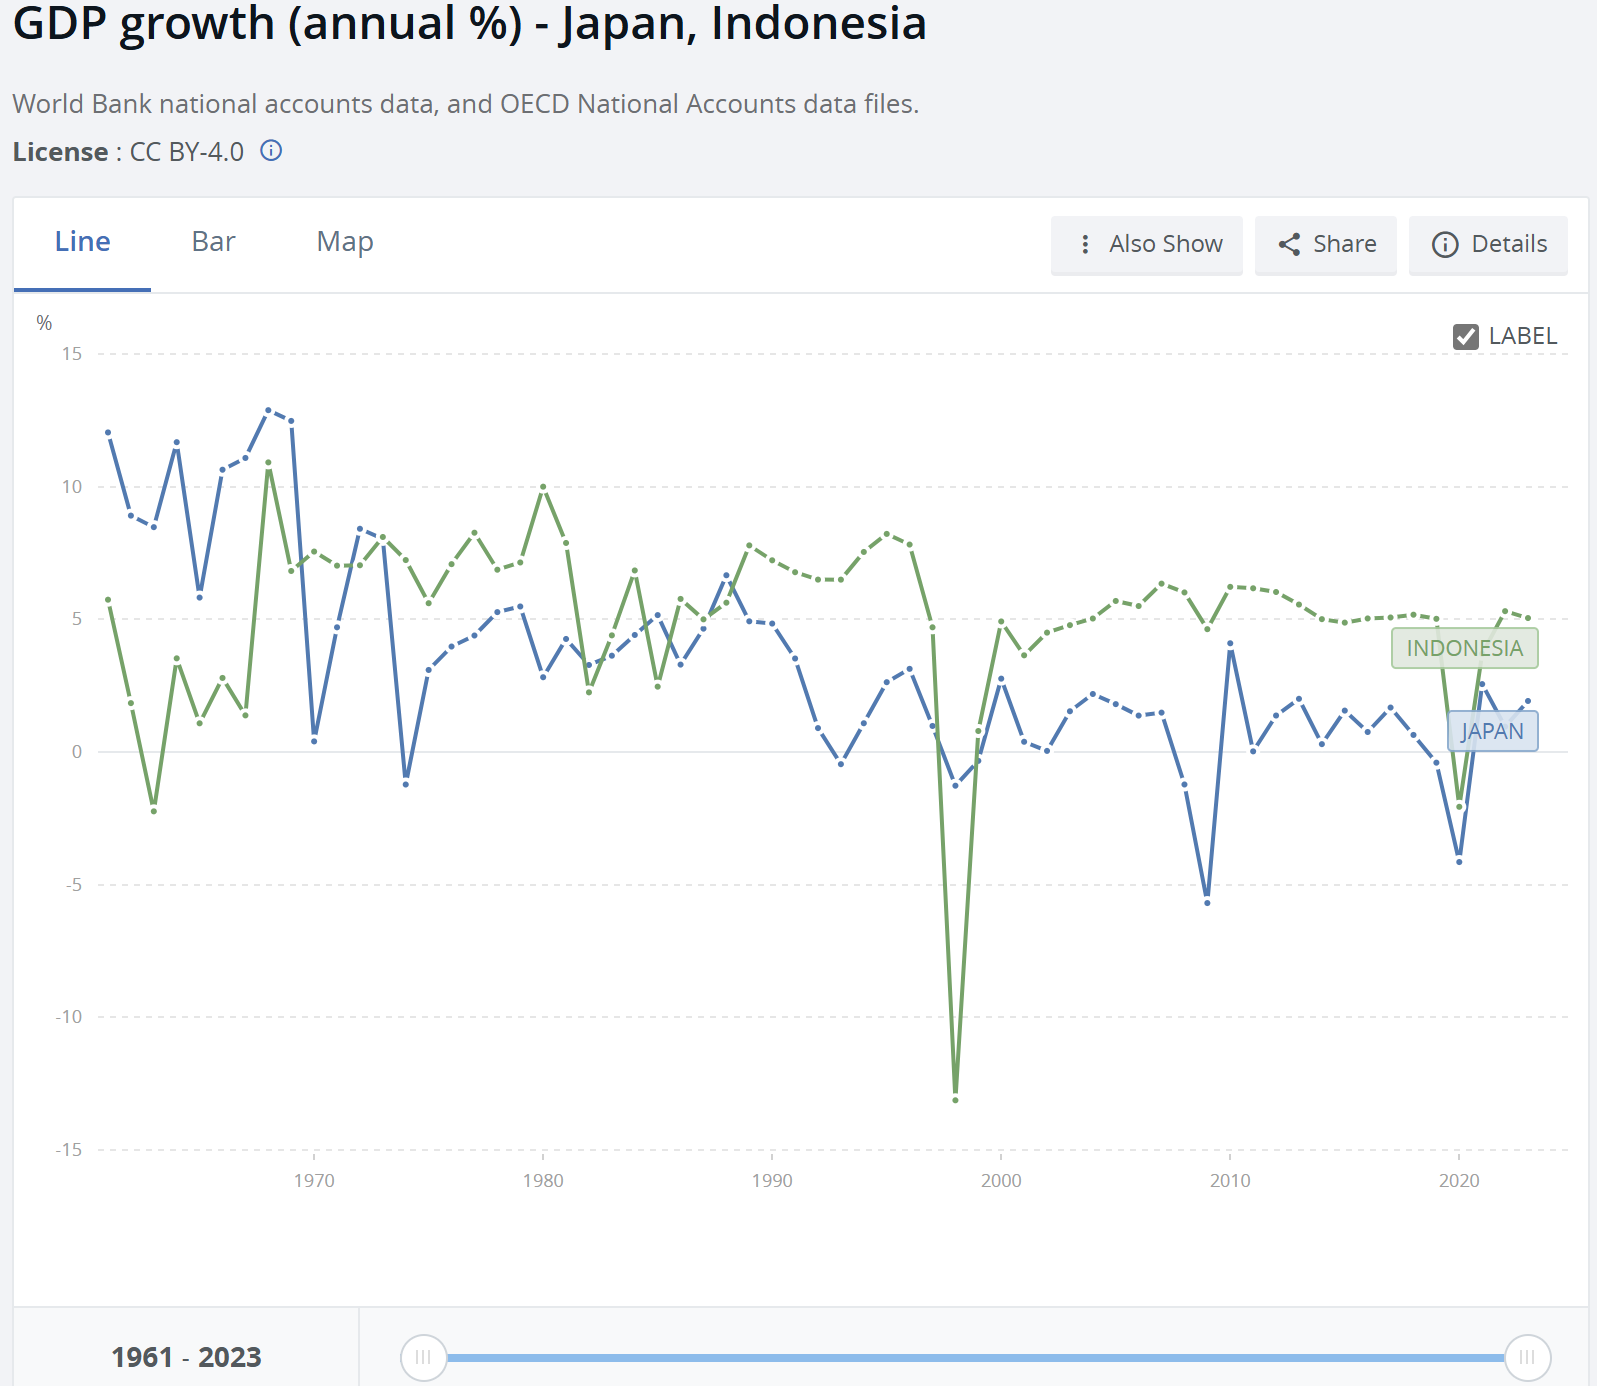

- China - Korean Rep GDP

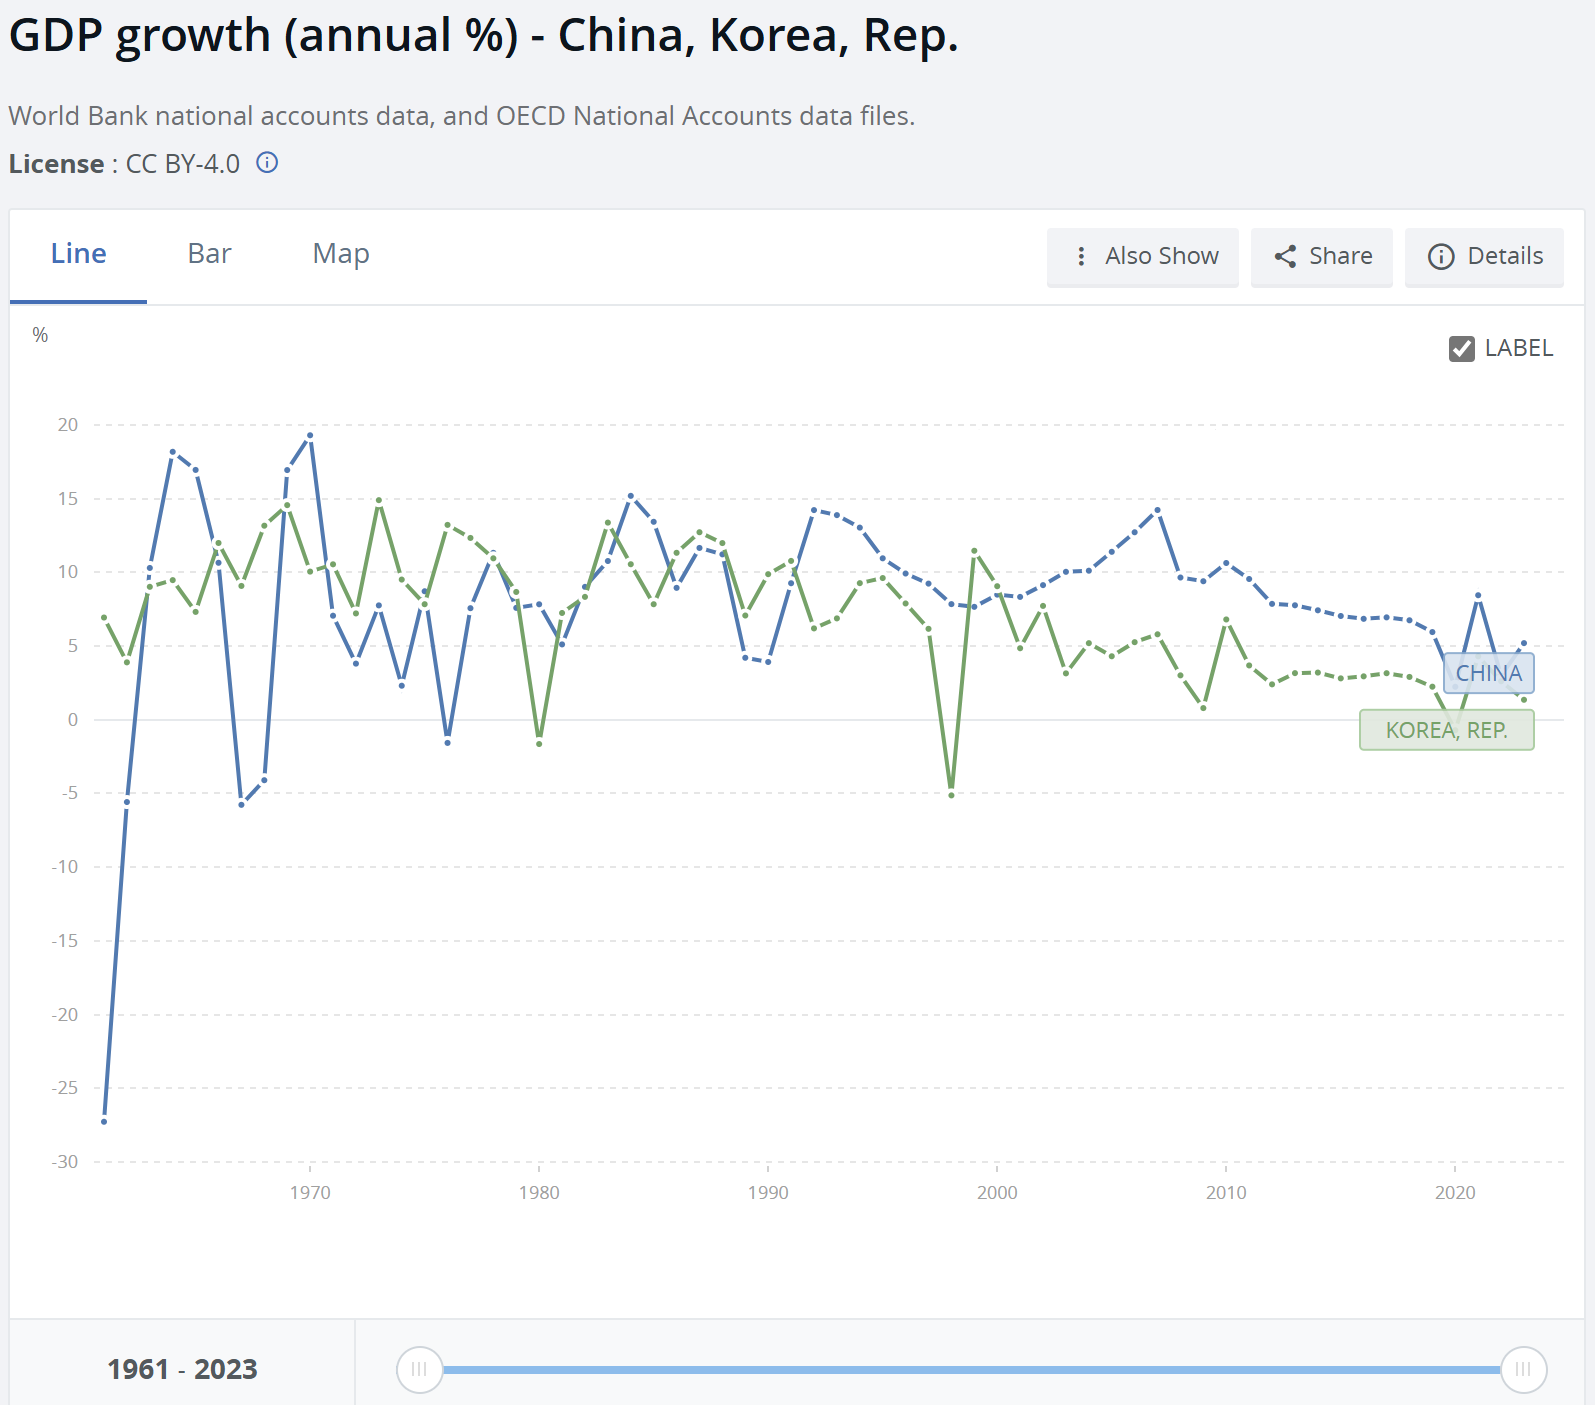

### Top Segmen By Profit, Sales, Margin

In [46]:
df_top_segmen = df.groupby('Segment')[['Profit','Sales','Margin']].sum()
df_top_segmen = df_top_segmen.reset_index()
df_top_segmen = df_top_segmen.rename(columns={'Profit':'Total Profit','Sales':'Total Sales','Margin':'Total Margin'})
df_top_segmen = df_top_segmen.sort_values(by='Total Profit', ascending=False)

display(df_top_segmen)

,Segment,Total Profit,Total Sales,Total Margin
1,SMB,134119.2092,1.161401e+06,90812.238102
2,Strategic,91979.1340,7.061464e+05,51695.873171
0,Enterprise,60298.6785,4.296531e+05,42613.111345


Text(0, 0.5, 'Total Margin ($)')

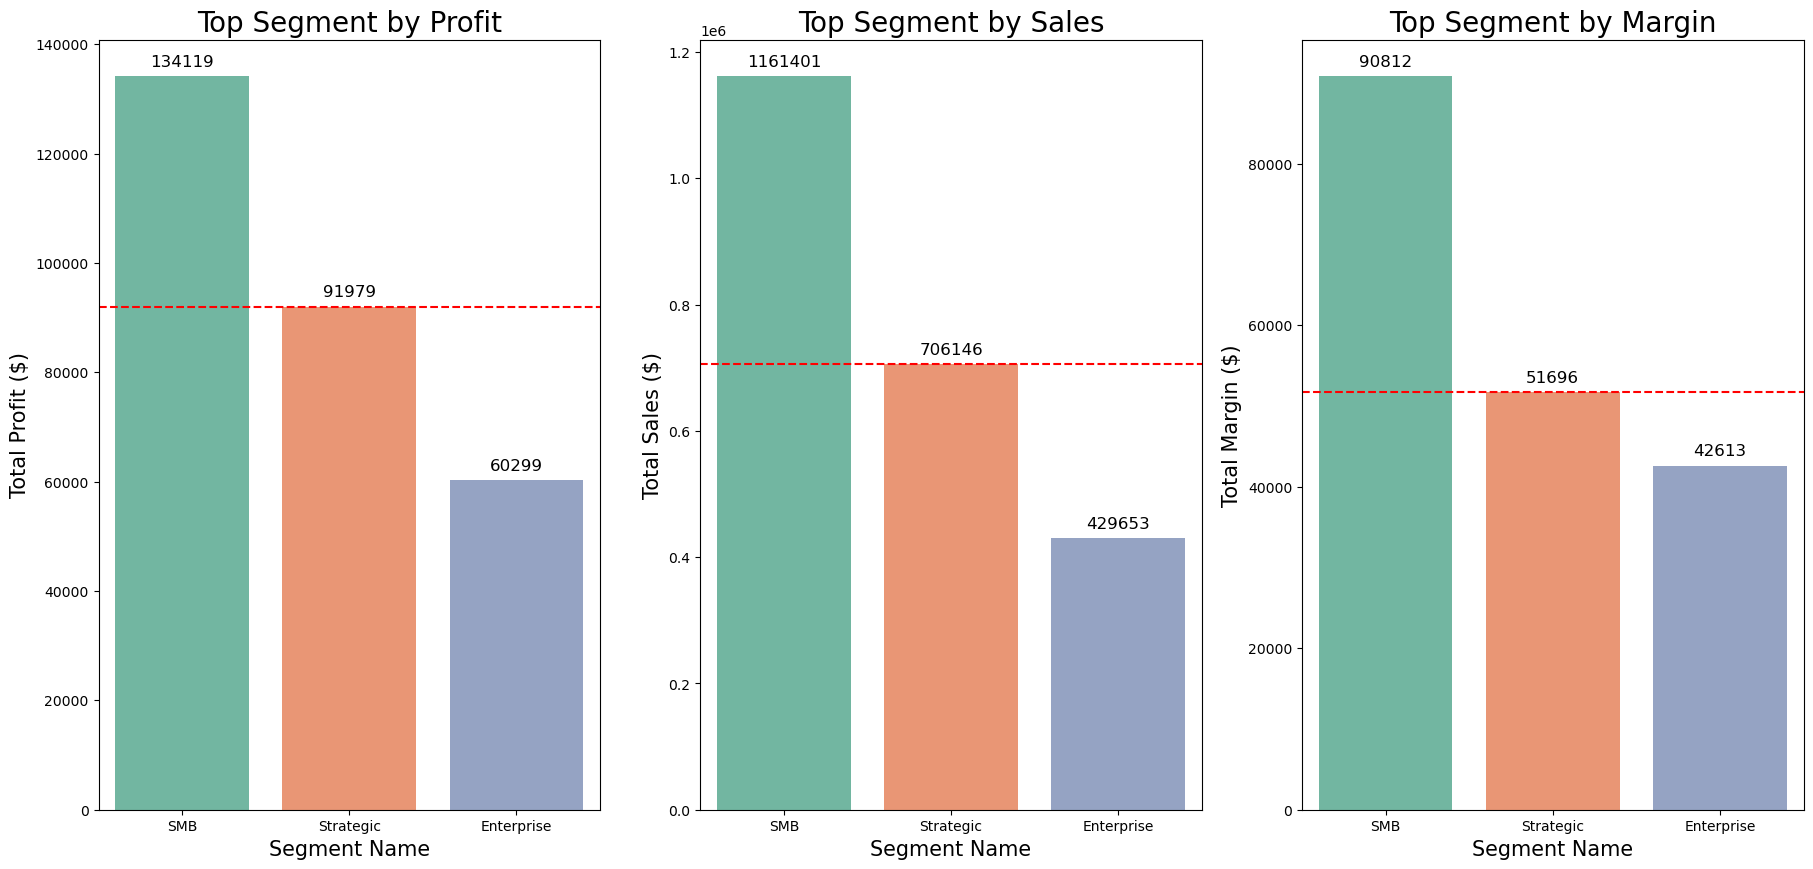

In [47]:
plt.figure(figsize=(22,10))
plt.subplot(1, 3, 1)
bar_plot = sns.barplot(data=df_top_segmen, x='Segment', y='Total Profit', palette='Set2')
for p in bar_plot.patches:
    bar_plot.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='bottom', fontsize=12, color='black', xytext=(0, 5), 
                      textcoords='offset points')
    
median_profit = df_top_segmen['Total Profit'].median()
plt.axhline(y=median_profit, color='red', linestyle='--', label='Median Profit')
    
plt.title('Top Segment by Profit', size=20)
plt.xlabel('Segment Name', size=15)
plt.ylabel('Total Profit ($)', size=15)

plt.subplot(1, 3, 2)
bar_plot = sns.barplot(data=df_top_segmen, x='Segment', y='Total Sales', palette='Set2')
for p in bar_plot.patches:
    bar_plot.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='bottom', fontsize=12, color='black', xytext=(0, 5), 
                      textcoords='offset points')
    
median_sales = df_top_segmen['Total Sales'].median()
plt.axhline(y=median_sales, color='red', linestyle='--', label='Median Sales')
    
plt.title('Top Segment by Sales', size=20)
plt.xlabel('Segment Name', size=15)
plt.ylabel('Total Sales ($)', size=15)

plt.subplot(1, 3, 3)
bar_plot = sns.barplot(data=df_top_segmen, x='Segment', y='Total Margin', palette='Set2')
for p in bar_plot.patches:
    bar_plot.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='bottom', fontsize=12, color='black', xytext=(0, 5), 
                      textcoords='offset points')
    
median_margin = df_top_segmen['Total Margin'].median()
plt.axhline(y=median_margin, color='red', linestyle='--', label='Median Margin')
    
plt.title('Top Segment by Margin', size=20)
plt.xlabel('Segment Name', size=15)
plt.ylabel('Total Margin ($)', size=15)

#### Insight
1. Top Segment by Profit
    - With Median as average limit, we could see SMB place 1st with total profit they give is $134.119, followed by
            - 
        
            2. Strategic                     ($91.979)
            3. Enterprise                    ($60.299)
            
2. Top Segment by Sales
    - With Median as average limit, we could see SMB place 1st with total profit they give is $1.161.401, followed by
            - 
            
            2. Strategic                     ($706.146)
            3. Enterprise                    ($429.653)
            
3. Top Segment by Margin
    - With Median as average limit, we could see SMB place 1st with total profit they give is $90.812, followed by
            - 
        
            2. Strategic                     ($51.696)
            3. Enterprise                    ($42.613)

Conclusion : 
 - While some Segment fall is above or in the average median, Enterprise are fall behind in all metric, either way profit, sales or Margin.
    - The reason why the of statistic is not good as expected as the lowest profit is ($60.299), sales is ($429.653), and margin is ($42.613) could be due to several factors such as. 
            -
    1. Enterprise clients usually require dedicated support and resources, which can strain internal teams and lead to higher ongoing costs, negatively impacting profit margins.
    2. Enterprise significant investment in sales and marketing efforts, which can lead to higher Customer Aquasation Rate compared to SMBs. This increased cost can erode profit margins.
    3. Enterprise sales often involve lengthy decision-making processes due to multiple stakeholders and bureaucratic hurdles. This can delay revenue recognition and impact overall sales figures.
        

### RFM

In [48]:
date_max = df['Order Date'].max()

rfm = df.groupby('Customer ID').agg({
    'Order Date': lambda x: (date_max - x.max()).days,
    'Sales': 'sum',
    'Customer ID': 'count'
}).rename(columns={'Order Date': 'Recency', 'Customer ID': 'Frequency'})

rfm.rename(columns={'Sales': 'Monetary'}, inplace=True)

rfm

,Recency,Monetary,Frequency
Customer ID,,,
1001,12,12617.1140,67
1002,27,27278.5930,153
1003,1,39941.6400,105
1004,13,23189.2165,134
1005,7,33514.9210,137
...,...,...,...
1097,39,29483.0050,103
1098,1,22650.8206,70
1099,2,23180.5442,98


In [49]:
rfm.describe()

,Recency,Monetary,Frequency
count,99.000000,99.000000,99.000000
mean,17.848485,23204.049094,100.949495
std,25.782197,10006.663857,35.479334
min,0.000000,5402.902000,22.000000
25%,4.500000,15692.639000,73.500000
50%,9.000000,22650.820600,100.000000
75%,22.500000,29486.288500,124.500000
max,209.000000,55719.210000,192.000000


In [50]:
def rfm_segment(row):
    # Recency
    if row['Recency'] <= 4.50:
        r_score = 4
    elif row['Recency'] <= 9.00:
        r_score = 3
    elif row['Recency'] <= 22.50:
        r_score = 2
    else:
        r_score = 1
    
    # Monetary
    if row['Monetary'] <= 15692.63:
        m_score = 1
    elif row['Monetary'] <= 22650.82:
        m_score = 2
    elif row['Monetary'] <= 29486.28:
        m_score = 3
    else:
        m_score = 4
    
    # Frequency
    if row['Frequency'] <= 73.50:
        f_score = 1
    elif row['Frequency'] <= 100.00:
        f_score = 2
    elif row['Frequency'] <= 124.50:
        f_score = 3
    else:
        f_score = 4

    
    return pd.Series([r_score, f_score, m_score])

rfm[['R_Score','M_Score', 'F_Score']] = rfm.apply(rfm_segment, axis=1)

rfm['RMF_Score'] = rfm['R_Score'].astype(str) + rfm['M_Score'].astype(str) + rfm['F_Score'].astype(str)

rfm

,Recency,Monetary,Frequency,R_Score,M_Score,F_Score,RMF_Score
Customer ID,,,,,,,
1001,12,12617.1140,67,2,1,1,211
1002,27,27278.5930,153,1,4,3,143
1003,1,39941.6400,105,4,3,4,434
1004,13,23189.2165,134,2,4,3,243
1005,7,33514.9210,137,3,4,4,344
...,...,...,...,...,...,...,...
1097,39,29483.0050,103,1,3,3,133
1098,1,22650.8206,70,4,1,3,413
1099,2,23180.5442,98,4,2,3,423


In [51]:
def label_customer(row):
    if row['R_Score'] == 4 and row['F_Score'] <= 4 and row['M_Score'] <= 4: #based .Describe Quantile
        return 'Top Customer'
    elif row['R_Score'] >= 2 and row['F_Score'] >= 2 and row['M_Score'] >= 2: #based .Describe Quantile
        return 'Mid Customer'
    else:
        return 'Low Customer'

rfm['Customer_Label'] = rfm.apply(label_customer, axis=1)

rfm

,Recency,Monetary,Frequency,R_Score,M_Score,F_Score,RMF_Score,Customer_Label
Customer ID,,,,,,,,
1001,12,12617.1140,67,2,1,1,211,Low Customer
1002,27,27278.5930,153,1,4,3,143,Low Customer
1003,1,39941.6400,105,4,3,4,434,Top Customer
1004,13,23189.2165,134,2,4,3,243,Mid Customer
1005,7,33514.9210,137,3,4,4,344,Mid Customer
...,...,...,...,...,...,...,...,...
1097,39,29483.0050,103,1,3,3,133,Low Customer
1098,1,22650.8206,70,4,1,3,413,Top Customer
1099,2,23180.5442,98,4,2,3,423,Top Customer


In [52]:
customer_counts = rfm['Customer_Label'].value_counts()

total_customers = len(rfm)

customer_percentage = (customer_counts / total_customers) * 100

summary = pd.DataFrame({
    'Count': customer_counts,
    'Percentage': customer_percentage
})

summary

,Count,Percentage
Customer_Label,,
Low Customer,38,38.383838
Mid Customer,36,36.363636
Top Customer,25,25.252525


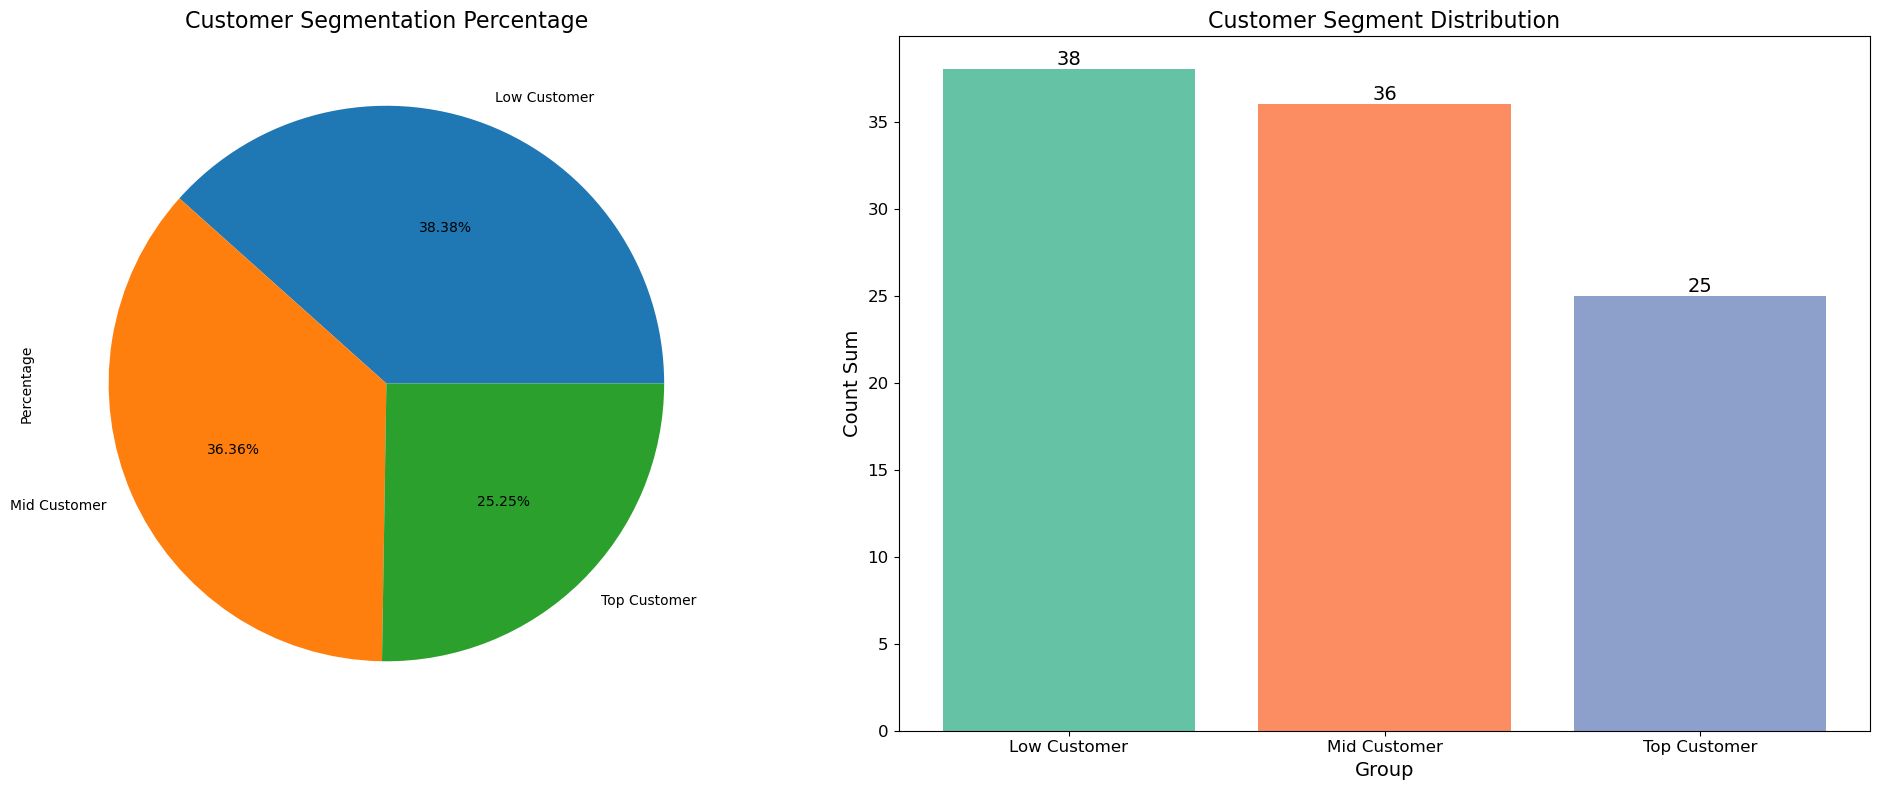

In [53]:
plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.title('Customer Segmentation Percentage', fontsize=16)

summary['Percentage'].plot.pie(autopct='%1.2f%%', labels=summary.index)

plt.subplot(1, 2, 2)

plt.bar(summary.index, summary['Count'], color=plt.cm.Set2.colors)

for index, value in enumerate(summary['Count']):
    plt.text(index, value, str(value), ha='center', va='bottom', fontsize=14)

plt.xlabel('Group', fontsize=14)
plt.ylabel('Count Sum', fontsize=14)
plt.title('Customer Segment Distribution', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

plt.show()

#### insight
1. Top Customers (25.25%): 
    - With almost 1/3 half of the customer base classified as top customers, prioritizing their needs and enhancing their experience can lead to increased loyalty and higher revenue.

2. Mid Customers (36.36%): 
    - The mid customer segment holds potential for growth by implementing targeted marketing strategies or loyalty programs could convert them into top customers

3. Low Attention (38.38%):
    - The low attention segment, was bigger then other, this should not be ignored. Discovering their lack of engagement can provide insights into potential barriers and opportunities for improvement

---

### Churn Rate

In [54]:
from datetime import datetime, timedelta

#### 30 Last day - Max Date Data

In [55]:
df['Order Date'].max()

Timestamp('2023-12-31 00:00:00')

In [56]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

gap_date = df['Order Date'].max() - timedelta(days=30) # 30 hari terakhir semenjak order date saat ini (Dari Data)

last_order = df.groupby('Customer ID')['Order Date'].max().reset_index()

last_order['Churn'] = last_order['Order Date'] < gap_date

total_customers = last_order['Customer ID'].nunique()
churned_customers = last_order[last_order['Churn']]['Customer ID'].nunique()
churn_rate = (churned_customers / total_customers) * 100

churned_customers = last_order[last_order['Churn']]

print(f"Churn Rate: {churn_rate:.2f}%")
print(churned_customers[['Customer ID', 'Order Date']])

Churn Rate: 19.19%
   Customer ID Order Date
17        1018 2023-11-25
19        1020 2023-06-05
22        1023 2023-11-24
26        1027 2023-11-18
33        1034 2023-11-15
37        1039 2023-11-18
39        1041 2023-10-17
40        1042 2023-11-26
41        1043 2023-11-18
50        1052 2023-11-19
56        1058 2023-11-20
57        1059 2023-11-26
59        1061 2023-09-26
73        1076 2023-11-24
76        1079 2023-11-09
82        1085 2023-11-14
91        1094 2023-11-26
94        1097 2023-11-22
98        1101 2023-11-22


In [57]:
df_churn_customer_30 = pd.DataFrame()
df_churn_customer_30['Customer ID'] = churned_customers['Customer ID']
df_merge = df_churn_customer_30.merge(df[['Customer ID', 'Customer','Product','Region']], on='Customer ID', how='left')
df_churn_customer_30['Customer'] = df_merge['Customer']
df_churn_customer_30['Product'] = df_merge['Product']
df_churn_customer_30['Region'] = df_merge['Region']
df_churn_customer_30['Order Date'] = churned_customers['Order Date']
display(df_churn_customer_30)
display(f"Churn Rate: {churn_rate:.2f}%")

,Customer ID,Customer,Product,Region,Order Date
17,1018,Petrobras,Marketing Suite - Gold,EMEA,2023-11-25
19,1020,Petrobras,ContactMatcher,EMEA,2023-06-05
22,1023,Petrobras,Support,APJ,2023-11-24
26,1027,Petrobras,Support,AMER,2023-11-18
33,1034,Petrobras,Support,AMER,2023-11-15
37,1039,Petrobras,Site Analytics,AMER,2023-11-18
39,1041,Petrobras,SaaS Connector Pack,EMEA,2023-10-17
40,1042,Petrobras,SaaS Connector Pack - Gold,APJ,2023-11-26
41,1043,Petrobras,FinanceHub,APJ,2023-11-18
50,1052,Citigroup,Site Analytics,AMER,2023-11-19


'Churn Rate: 19.19%'

##### Insight
Total Customers:

There are 21 unique customers in this dataset.
1. Total Products:
    - A total of 10 different products have been purchased by customers.
2. Regions:
    - The data includes 3 regions: EMEA, APJ, and AMER.
3. Order Dates:
    - Order dates range from 2023-06-05 to 2023-11-26.
4. Customers and Products:
    - Petrobras: 8 products
    - Citigroup: 4 products
    - China National Petroleum: 6 products
5. Churn Rate:
    - The churn rate is 19.19%. This indicates the percentage of customers who have stopped using the products or services within a certain period.

#### 90 Last day - Max Date Data

In [58]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

gap_date = df['Order Date'].max() - timedelta(days=90) # 30 hari terakhir semenjak order date saat ini (Data)

last_order = df.groupby('Customer ID')['Order Date'].max().reset_index()

last_order['Churn'] = last_order['Order Date'] < gap_date

total_customers = last_order['Customer ID'].nunique()
churned_customers = last_order[last_order['Churn']]['Customer ID'].nunique()
churn_rate = (churned_customers / total_customers) * 100

churned_customers = last_order[last_order['Churn']]

print(f"Churn Rate: {churn_rate:.2f}%")
print(churned_customers[['Customer ID', 'Order Date']])

Churn Rate: 2.02%
   Customer ID Order Date
19        1020 2023-06-05
59        1061 2023-09-26


In [59]:
df_churn_customer_90 = pd.DataFrame()
df_churn_customer_90['Customer ID'] = churned_customers['Customer ID']
df_merge = df_churn_customer_90.merge(df[['Customer ID', 'Customer','Product','Region']], on='Customer ID', how='left')
df_churn_customer_90['Customer'] = df_merge['Customer']
df_churn_customer_90['Product'] = df_merge['Product']
df_churn_customer_90['Region'] = df_merge['Region']
df_churn_customer_90['Order Date'] = churned_customers['Order Date']
display(df_churn_customer_90)
display(f"Churn Rate: {churn_rate:.2f}%")

,Customer ID,Customer,Product,Region,Order Date
19,1020,Citigroup,OneView,EMEA,2023-06-05
59,1061,Marathon Petroleum,ContactMatcher,APJ,2023-09-26


'Churn Rate: 2.02%'

##### Insight
Total Customers:

There are 2 unique customers in this dataset.
1. Total Products:
    - A total of 2 different products have been purchased by customers.
2. Regions:
    - The data includes 2 regions: EMEA and APJ.
3. Order Dates:
    - Order dates range from 2023-06-05 to 2023-09-26.
4. Customers and Products:
    - Citigroup: 1 product (OneView)
    - Marathon Petroleum: 1 product (ContactMatcher)
5. Churn Rate:
    - The churn rate is 2.02%, This indicates the percentage of customers who have stopped using the products or services within a certain period.

#### 150 Last day - Max Date Data

In [60]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

gap_date = df['Order Date'].max() - timedelta(days=150) # 30 hari terakhir semenjak order date saat ini (Data)

last_order = df.groupby('Customer ID')['Order Date'].max().reset_index()

last_order['Churn'] = last_order['Order Date'] < gap_date

total_customers = last_order['Customer ID'].nunique()
churned_customers = last_order[last_order['Churn']]['Customer ID'].nunique()
churn_rate = (churned_customers / total_customers) * 100

churned_customers = last_order[last_order['Churn']]

print(f"Churn Rate: {churn_rate:.2f}%")
print(churned_customers[['Customer ID', 'Order Date']])

Churn Rate: 1.01%
   Customer ID Order Date
19        1020 2023-06-05


In [61]:
df_churn_customer_150 = pd.DataFrame()
df_churn_customer_150['Customer ID'] = churned_customers['Customer ID']
df_merge = df_churn_customer_150.merge(df[['Customer ID', 'Customer','Product','Region']], on='Customer ID', how='left')
df_churn_customer_150['Customer'] = df_merge['Customer']
df_churn_customer_150['Product'] = df_merge['Product']
df_churn_customer_150['Region'] = df_merge['Region']
df_churn_customer_150['Order Date'] = churned_customers['Order Date']
display(df_churn_customer_150)
display(f"Churn Rate: {churn_rate:.2f}%")

,Customer ID,Customer,Product,Region,Order Date
19,1020,Citigroup,OneView,EMEA,2023-06-05


'Churn Rate: 1.01%'

##### Insight
Total Customers:

There are 1 unique customers in this dataset.
1. Total Products:
    - A total of 1 different products have been purchased by customers.
2. Regions:
    - The data includes 1 regions: EMEA.
3. Order Dates:
    - Order dates from 2023-06-05.
4. Customers and Products:
    - Citigroup: 1 product (OneView)
5. Churn Rate:
    - The churn rate is 1.01%, This indicates the percentage of customers who have stopped using the products or services within a certain period.

---

# Summary

- **Data Period ( 2020 - 2023 )**
- **Region (EMEA, AMER and APJ)**

1. **Data Handling**
    - Our data have 
        - 19 columns --> 18 Columns, after drop columns `Date Key`
        - Still have 9994 Row Data

    - Our data type have change 
        - `Row ID` from int --> object
        - `Order Date` from object --> datetime
        - `Customer ID` from int --> object
        
    - There is no missing Value in our data indicating our handling is Succes
    ---

2. **Outlier**
- Keeping the outlier considering no missing value, and all **`License`** in are all unique, meaning that all row that represent transaction are indeed fact
    - Sales: There are 1167 outliers, showing that some transactions involve very large amounts.

    - Quantity: There are 170 outliers, either way customer buy rarely or but in bulk amount of product.

    - Discount: There are 856 outliers in discounts, with most values more than 0.5, likely indicating special deals or promotions offered to certain customers in small portion and event.

    - Profit: There are 1,881 outliers for profit, meaning some transactions resulted in either very high or very low profits.
    ---

3. **Add Columns Data**
    - Columns = `Discount Nominal` (Columns will show total Discount in Currency not Ratio) 
    - Columns = `Sales Discount` (Column will show Total Sales after being substrack with Discount)
    - Columns = `Margin` (Columns will show the gap beetween Profit and Sales Discount in Ratio)
    - Columns = `Product Price` (Column will show price of 1 product or price @product)
    ---

4. **Analysis Data**
    1. **Sales and Profit trend**
        - Yearly
            - **Overall Trend**: Upward trend.
                - Reason:
                - Significant increase, possibly to increased marketing efforts ,the application of promo of the  product's by potential users, and the early on of CORONA VIRUS, which make more business more digital awareness.
            ---

        - Monthly
            1. 2020:
                - **Overall Trend**: Upward trend.
            2. 2021:
                - **Overall Trend**: Upward trend.
            3. 2022:
                - **Overall Trend**: Upward trend, with fluctuations through the year.
            4. 2023:
                - **Overall Trend**: Upward trend, with significant growth in the latter half of the year.
           
            - Reason:
                - mostly growth maybe almost for real driven by strong marketing efforts, new product features, and increased demand for cloud services.
        ---

    2. **Discount Strategy**
        - From analysis we know **APJ** are region who suffered from failed strategy of applied Discount
        - After analysis with Heatmap for find score corelation we get
            1. There is a moderate negative correlation **(-0.45)** between Discount Nominal and Profit. This suggests that as discounts increase, profit tends to decrease, likely due to lower prices reducing overall profit margins.
            2. There is a moderate positive correlation **(0.37)** between Discount Nominal and Sales. This suggests that as the discount amount increases, sales tend to increase as well.
        - After Test Hyphotesis we get that 
            1. pvalue = 4.013451757542631e-55. pvalue < 0.05. Reject Ho. 
            2. We do have enough evidence that there is significant difference in Profit between High and Low discount levels.
        - So know we know that discount who categorized **HIGH** > 50% are worst to our profit gain that why,
        - Find The **best Discount**
            1. "High" discounts (above the median) ($13.88) start to negatively affect profitability. --> From Hypothesis
            - Which after finding the best discount, it proven that after discount being applied 50% more it starting derived
            - While in Hypothesis we only divided discount based on `High Discount` and `Low Discount` , for this testing we divided into 3 low (0-20%), medium (20-50%), high (50%+)
            2. The best Discount for being Applied in region APJ are Low(0-20%) which you can choose whethener discound from 
                - Discount that you can applied = 0 %, 20 %, and 30 %
        - Find The **specified Discount Best**
            1. The best Discount for being Applied in region APJ are Low(0-20%) which you can choose whethener discound from 
                - Discount that you can applied = 0 %, 20 % and 30% 
            - New Insight
            2. From the table we can see when we dont applied any discount(0%) the profit start with $20.32790, when we choose to applied discount (0.2/20%) it start change the profit from 20 to 5 which decrese $15 profit, but the discount are being use as a part of **PROMO ENGAGEMENT** that the company do, so now we will check the other discount (0.3/30%) is decrese much further to -29 which the gap from 20% are $24, so the best discount the company can be applied are **20 %** or below.

        ---

    3. **Customer, Product, Segment and Region**
        1. **Top 10 Customer**
            1. TOP 10 Customer by Profit
            - With Median as average limit, we could see Coca Cola place 1st with total profit they give is $8400, followed by
            - 
            
                    2. Mondales International   ($6720)
                    3. Lowes                    ($5040)
                    4. Valero Energy            ($4949)
                    5. Antehm                   ($4630)
        
            2. TOP 10 Customer by Sales
                - With Median as average limit, we could see Coca Cola place 1st with total Sales they give is $17500, followed by
                - 
                
                    2. Mondales International   ($14000)
                    3. Trafigura Group          ($11200)
                    4. Lowes                    ($10500)
                    5. Valero Energy            ($9893)
            3. TOP 10 Customer by Margin
                - With Median as average limit, we could see Trafigura Group place 1st with total Margin they give is $6860, followed by
                - 
                
                    2. Coca Cola                ($4023)
                    3. Mondales International   ($3226)
                    4. Valero Energy            ($2473)
                    5. Lowes                    ($2419)

        2. **Highest Product by Sales, Profit, and Margin**
            - While other Product fall behind the average median, it doesnt mean bad, They still provide greater profits,Sales and Margin for Company
            - But still the reason why the of statistic is not good as expected as the lowest profit is even mines (-$3.473) from Marketing Suite, sales is ($3024) from Storage, and margin is ($407) from Storage could be due to several factors such as. 

                1. Even though Product marketing Suite have mines profit (-$3.473) but also have margin positive ($5.816) this potentialy could happen because in visualization using barchart, use sum as aggregate this trigger 2 condition when The total of profits is more negative than the positive value of profits, while the The Total margin is based on formula profit/sales * profit, because of this the margin in this data have more positive value then negative one
                2. The product may have a good margin, but if the sales volume is low, the total profit can remain negative. This indicates that although each unit sold is profitable, not enough units sold to cover the fixed cost.
                3.  If a product is sold at a large discount to attract customers, this could reduce total revenue even if the margin per unit remains positive. This can lead to negative profits if the discount is too large.

            - Although it looks statistically bad, there are also possibilities such as
                1. This situation could indicate that the product may have the potential to generate profits in the future if sales volume increases or costs can be controlled. A positive margin indicates that the product has the potential to be profitable if managed properly.

        3. **Top Region**
            1. Top Region by Profit
                - With Median as average limit, we could see EMEA place 1st with total profit they give is $55.168, followed by
                        - 
                    
                        2. AMER                     ($44.516)
                        3. APJ                      ($41.937)
                        
            2. Top Region by Sales
                - With Median as average limit, we could see EMEA place 1st with total profit they give is $410.378, followed by
                        - 
                        
                        2. AMER                     ($340.935)
                        3. APJ                      ($330.007)
                        
            3. Top Region by Margin
                - With Median as average limit, we could see EMEA place 1st with total profit they give is $44.097, followed by
                        - 
                    
                        2. AMER                     ($28.021)
                        3. APJ                      ($17.436)

        4. **Top Segment**
        - While some Segment fall is above or in the average median, **Enterprise are fall behind** in all metric, either way profit, sales or Margin.
            - The reason why the of statistic is not good as expected as the lowest profit is ($60.299), sales is ($429.653), and margin is ($42.613) could be due to several factors such as. 
                    -
            1. Enterprise clients usually require dedicated support and resources, which can strain internal teams and lead to higher ongoing costs, negatively impacting profit margins.
            2. Enterprise significant investment in sales and marketing efforts, which can lead to higher Customer Aquasation Rate compared to SMBs. This increased cost can erode profit margins.
            3. Enterprise sales often involve lengthy decision-making processes due to multiple stakeholders and bureaucratic hurdles. This can delay revenue recognition and impact overall sales figures.

        5. **RFM**
            1. Top Customers (25.25%): 
                - With almost 1/3 half of the customer base classified as top customers, prioritizing their needs and enhancing their experience can lead to increased loyalty and higher revenue.

            2. Mid Customers (36.36%): 
                - The mid customer segment holds potential for growth by implementing targeted marketing strategies or loyalty programs could convert them into top customers

            3. Low Attention (38.38%):
                - The low attention segment, was bigger then other, this should not be ignored. Discovering their lack of engagement can provide insights into potential barriers and opportunities for improvement

        6. **Churn Rate**
            1. 30 last day
                - There are 21 unique customers in this dataset.
                    1. Total Products:
                        - A total of 10 different products have been purchased by customers.
                    2. Regions:
                        - The data includes 3 regions: EMEA, APJ, and AMER.
                    3. Order Dates:
                        - Order dates range from 2023-06-05 to 2023-11-26.
                    4. Customers and Products:
                        - Petrobras: 8 products
                        - Citigroup: 4 products
                        - China National Petroleum: 6 products
                    5. Churn Rate:
                        - **The churn rate is 19.19%.** This indicates the percentage of customers who have stopped using the products or services within a certain period.

            2. 90 last day
                - There are 2 unique customers in this dataset.
                    1. Total Products:
                        - A total of 2 different products have been purchased by customers.
                    2. Regions:
                        - The data includes 2 regions: EMEA and APJ.
                    3. Order Dates:
                        - Order dates range from 2023-06-05 to 2023-09-26.
                    4. Customers and Products:
                        - Citigroup: 1 product (OneView)
                        - Marathon Petroleum: 1 product (ContactMatcher)
                    5. Churn Rate:
                        - **The churn rate is 2.02%,** This indicates the percentage of customers who have stopped using the products or services within a certain period.

            3. 150 last day
                - There are 1 unique customers in this dataset.
                    1. Total Products:
                        - A total of 1 different products have been purchased by customers.
                    2. Regions:
                        - The data includes 1 regions: EMEA.
                    3. Order Dates:
                        - Order dates from 2023-06-05.
                    4. Customers and Products:
                        - Citigroup: 1 product (OneView)
                    5. Churn Rate:
                        - **The churn rate is 1.01%,** This indicates the percentage of customers who have stopped using the products or services within a certain period.

---

# Recomendation

1. **Sales and Profit trend**
    1. Enhance Marketing Efforts
        - Optimize Digital Marketing: Focus on digital campaigns like social media to increase product visibility and engagement.
        - Target New Markets: Leverage customer data to identify untapped markets, especially in little/low regions.
        - Data-Driven Campaigns: Use customer analytics to create personalized and relevant marketing campaigns.

    2. Focus on International Markets
        - Localize Products: Adapt SaaS services for international markets with localized features (e.g., languages, payment methods).
        - Regional Expansion: Target emerging markets with rapid tech adoption, such as Japan, China, America, England, Korea, etc.

    3. Digital Transformation Sector
        - Strategic Partnerships: Collaborate with large corporations or educational institutions ex: (Purwadhika,DTI, etc) to introduce AWS SaaS solutions.
        - Educational Programs: Host webinars, training sessions, and online courses to increase awareness and technical skills among potential users.

    4. Manage Fixed and Operational Costs
        - Evaluate Cost Structure: Identify and reduce unnecessary fixed costs associated with these products.
        - Scale Production Strategically: Produce quantities aligned with demand to avoid excess inventory costs.

2. **Discount Strategy**
    1. Optimize Discount Strategy
        - Cap Discounts at 20%: Ensure that discounts offered do not exceed 20%, as higher discounts erode profitability.
        - Segmented Discounting: Apply targeted discounts based on customer segments or regions, focusing 0-20% discounts in regions like AMER and EMEA where they are most profitable.
        - Tiered Discounts/ Bundling Discounts: Offer lower discounts ex: (5-10%) for loyal customers or bundle deals, and reserve higher discounts (15-20%) for new customer acquisition.

    2. Measure Promo Effectiveness
        - A/B Testing: Experiment with varying discount levels like (10% vs 20%) to identify the optimal balance for profitability and customer acquisition.
        - Promotional Calendar: Schedule discounts strategically for peak seasons or product launches to maximize customer engagement and sales, that eventually lead to more profit being generate.

    3. Reduce Dependence on Discounts
        - Benefits Programs: Introduce benefits tratment like loyalty points or extended trial periods to reduce reliance on direct discounts.
        - Bundle Offers: Package services or products together to provide perceived value without direct given discounts for each transaction.

3. **Customer, Product, Segment and Region**
    1. Build a Long-Term Strategy for Marketing Suite
        - Product Enhancement: Invest in R&D to improve product features and align it with customer need.
        - Long-Term Promotions: Run awareness campaigns to build adoption while carefully balancing discounts to avoid excessive losses.
        - Analyze Customer Feedback: Collect feedback to identify barriers to adoption and refine the product to better meet market expectations.

    2. Sales Cycles
        - Simplify Proposals: Create standardized, easy-to-understand proposals that reduce the need for excessive deliberation.
        - Executive Engagement: Engage top-level stakeholders early in the sales process to speed up decision-making.
        - Demonstrate Investment Report: Present report, about quantifiable benefits during the initial stages of discussions to address concerns and to make decisions.
    
    3. Strengten Top Customers (25.25%)
        - Exclusive Rewards: Offer loyalty programs, personalized discounts, or early access (Beta Acces) to new features/products to make top customers feel valued.
        - Proactive Engagement: Provide dedicated support to ensure they remain satisfied and engaged.
        - Gather Feedback: Make reguler survey top customers to understand their needs and refine offerings based on their input.
    
    4. Solidify Mid Customers (36.36%)
        - Loyalty Programs: Introduce tiered programs where mid-level customers can unlock additional perks as they increase their engagement.
        - Product Education: Host webinars, tutorials, or personalized onboarding to help mid customers fully utilize your products/services.
        - Incentif Upgrades: Offer limited-time discounts or bonuses for mid customers who upgrade to higher-tier plans or products.
    
    5. Re-Engage Low Customers (38.38%)
        - Identify Barriers: Conduct surveys or analyze behavioral data to understand why these customers are disengaged (e.g., pricing, product complexity, lack of relevance).
        - Engagement Campaigns: Use personalized offers, such as discounts or free trials, to encourage re-engagement.
        - Simplified Agremeent: Ensure that initial experiences are smooth and intuitive, especially for new customers in this segment.
        - Content Marketing Digital: Provide value through educational content, blogs, or tutorials to keep these customers engaged and interested in your offerings.
        - Segmentation-Based Targeting: Divide the low segment into smaller subgroups and re-strategize the marketing option.
    
    6. Monitor and Optimize Churn Rate
        - Reduce churn by focusing on proactive re-engagement and win-back strategies for at-risk customers.
        - Strengthen relationships with top clients like Petrobras, Citigroup, and China National Petroleum to ensure their continued loyalty.
        - Promote broader product usage and educate customers to deepen engagement and reduce churn risk.
        - Continuously track and refine churn Rate to measure the oppurtunity of retention.


---

# Dashboard
The Dashboard can be accessed [here](https://public.tableau.com/app/profile/shafy.hafidz/viz/SHAFYHAFIDZ_DASHBOARDAWSSaaSAnalysis/ProductDashboard?publish=yes).

---